 Projet 11 - Modélisez les ventes d'un ensemble de magasin roupe.

# 1. Exploration structure jeu de données

In [3]:
# importation librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
#imports fichiers excel

df_train = pd.read_csv('train.csv')
df_store = pd.read_csv('store.csv')
df_test = pd.read_csv('test.csv')
df_subm = pd.read_csv('sample_submission.csv')

C:\Users\grego\AppData\Local\Temp\ipykernel_3784\724278709.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


##  1.1 fichier train

In [6]:
display (df_train)
df_train.info()
pd.set_option('display.float_format', '{:.2f}'.format)
df_train.describe()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Store  DayOfWeek      Sales  Customers       Open      Promo  \
count 1017209.00 1017209.00 1017209.00 1017209.00 1017209.00 1017209.00   
mean      558.43       4.00    5773.82     633.15       0.83       0.38   
std       321.91       2.00    3849.93     464.41       0.38       0.49   
min         1.00       1.00       0.00       0.00       0.00       0.00   
25%       280.00       2.00    3727.00     405.00       1.00       0.00   
50%       558.00       4.00    5744.00     609.00       1.00       0.00   
75%       838.00       6.00    7856.00     837.00       1.00       1.00   
max      1115.00       7.00   41551.00    7388.00       1.00       1.00   

       SchoolHoliday  
count     1017209.00  
mean            0.18  
std             0.38  
min             0.00  
25%             0.00  
50%             0.00  
75%             0.00  
max             1.00

In [7]:
# 0 valeurs manquantes
# colonne stateholiday = format objet / valeurs "0,a,b,c," à passer en valeurs 1 et 0 et format integer
# a priori pas d'outliers ou valeurs négatives
# ventes moyenne = 5773
# clientele moyenne = 633

## 1.2 fichier store

In [9]:
#exploration fichier store
display (df_store)
df_store.info()
print(df_store.isnull().sum())
df_store.describe()

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a              1270.00   
1         2         a          a               570.00   
2         3         a          a             14130.00   
3         4         c          c               620.00   
4         5         a          a             29910.00   
...     ...       ...        ...                  ...   
1110   1111         a          a              1900.00   
1111   1112         c          c              1880.00   
1112   1113         a          c              9260.00   
1113   1114         a          c               870.00   
1114   1115         d          c              5350.00   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9.00                   2008.00       0   
1                         11.00                   2007.00       1   
2                         12.00                   2006.00       1   
3                          9.00                   2009.00       0   
4                          4.00                   2015.00       0   
...                         ...                       ...     ...   
1110                       6.00                   2014.00       1   
1111                       4.00                   2006.00       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1               13.00          2010.00   Jan,Apr,Jul,Oct  
2               14.00          2011.00   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
...               ...              ...               ...  
1110            31.00          2013.00   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114            22.00          2012.00  Mar,Jun,Sept,Dec  

[1115 rows x 10 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth 

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count 1115.00              1112.00                     761.00   
mean   558.00              5404.90                       7.22   
std    322.02              7663.17                       3.21   
min      1.00                20.00                       1.00   
25%    279.50               717.50                       4.00   
50%    558.00              2325.00                       8.00   
75%    836.50              6882.50                      10.00   
max   1115.00             75860.00                      12.00   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  
count                    761.00 1115.00           571.00           571.00  
mean                    2008.67    0.51            23.60          2011.76  
std                        6.20    0.50            14.14             1.67  
min                     1900.00    0.00             1.00          2009.00  
25%                     2006.00    0.00            13.00          2011.00  
50%                     2010.00    1.00            22.00          2012.00  
75%                     2013.00    1.00            37.00          2013.00  
max                     2015.00    1.00            50.00          2015.00

In [10]:
# enormes quantités de valeurs manquantes pour les colonnes des dates d'ouvertures mois et années des concurrents et dates semaines et années des promotions spécifiques
# ces colonnes sont pas exploitables, 50% de données manquantes et 70%

# colonne distance concurrents affiché en metres à mettre en km
# distance moyenne concurrents = 5.4kms
# pharamacie suivant une promotion continue (colonne promo2): 50%

## 1.3 fichier test

In [12]:
#exploration fichier test
display (df_test)
df_test.info()
print(df_test.isnull().sum())
df_test.describe()

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17  1.00      1            0   
1          2      3          4  2015-09-17  1.00      1            0   
2          3      7          4  2015-09-17  1.00      1            0   
3          4      8          4  2015-09-17  1.00      1            0   
4          5      9          4  2015-09-17  1.00      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01  1.00      0            0   
41084  41085   1112          6  2015-08-01  1.00      0            0   
41085  41086   1113          6  2015-08-01  1.00      0            0   
41086  41087   1114          6  2015-08-01  1.00      0            0   
41087  41088   1115          6  2015-08-01  1.00      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1  

[41088 rows x 8 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


Id    Store  DayOfWeek     Open    Promo  SchoolHoliday
count 41088.00 41088.00   41088.00 41077.00 41088.00       41088.00
mean  20544.50   555.90       3.98     0.85     0.40           0.44
std   11861.23   320.27       2.02     0.35     0.49           0.50
min       1.00     1.00       1.00     0.00     0.00           0.00
25%   10272.75   279.75       2.00     1.00     0.00           0.00
50%   20544.50   553.50       4.00     1.00     0.00           0.00
75%   30816.25   832.25       6.00     1.00     1.00           1.00
max   41088.00  1115.00       7.00     1.00     1.00           1.00

In [13]:
# 11 valeurs manquantes dans la colonne open

# 2 Préparation jeu de données

## 2.1 fichier train

In [16]:
#remplacement valeurs vacances
df_train['StateHoliday'] = df_train['StateHoliday'].replace(['a','b','c'], 1)
df_train['StateHoliday'] = df_train['StateHoliday'].astype("int64")
df_train["Date"] = pd.to_datetime(df_train["Date"])
# Convertir la colonne Date en format datetime
df_train['Date'] = pd.to_datetime(df_train['Date'], format='%d/%m/%Y')
# Extraire du mois (préparation lien avec colonne "PromoInterval" du fichier store où sont indiqués les mois en promos
df_train['Month'] = df_train['Date'].dt.strftime('%m')
df_train['Month'] = df_train['Month'].astype("int64")
depcol = df_train.pop("Month")
df_train.insert(3, "Month", depcol)
#afficher les modifs
display (df_train)
df_train.info()

Store  DayOfWeek       Date  Month  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31      7   5263        555     1      1   
1            2          5 2015-07-31      7   6064        625     1      1   
2            3          5 2015-07-31      7   8314        821     1      1   
3            4          5 2015-07-31      7  13995       1498     1      1   
4            5          5 2015-07-31      7   4822        559     1      1   
...        ...        ...        ...    ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      1      0          0     0      0   
1017205   1112          2 2013-01-01      1      0          0     0      0   
1017206   1113          2 2013-01-01      1      0          0     0      0   
1017207   1114          2 2013-01-01      1      0          0     0      0   
1017208   1115          2 2013-01-01      1      0          0     0      0   

         StateHoliday  SchoolHoliday  
0                   0              1  
1                   0              1  
2                   0              1  
3                   0              1  
4                   0              1  
...               ...            ...  
1017204             1              1  
1017205             1              1  
1017206             1              1  
1017207             1              1  
1017208             1              1  

[1017209 rows x 10 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Month          1017209 non-null  int64         
 4   Sales          1017209 non-null  int64         
 5   Customers      1017209 non-null  int64         
 6   Open           1017209 non-null  int64         
 7   Promo          1017209 non-null  int64         
 8   StateHoliday   1017209 non-null  int64         
 9   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 77.6 MB


## 2.2 fichier store

In [18]:
#suppression colonnes inutilisables
df_store.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear'], axis=1, inplace=True)
df_store['CompetitionDistance'] = (df_store['CompetitionDistance'] / 1000).round(2)
#remplacements valeurs vides colonnes competitiondistance
df_store["CompetitionDistance"].fillna(0,inplace=True)
# transformation valeurs mois dans colonne promointerval en format numérique numérique
#remplacements valeurs vides colonnes promointerval
df_store["PromoInterval"].fillna("0",inplace=True)
#dictionnaire correspondance: 
mois_dic= {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
    'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
    'Sept': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}
# Remplacement valeurs dans colonne
for mois, num in mois_dic.items():
    df_store['PromoInterval'] = df_store['PromoInterval'].str.replace(mois, num)
#changement des valeurs des colonnes assortment et storetype en caracteres numériques car dans le displayu meme en mettant les colonnes en format text, il y a toujours des valeurs qui s'affichent comme "un"
df_store['Assortment'] = df_store['Assortment'].replace({'a': 1, 'b': 2, 'c': 3})
df_store['StoreType'] = df_store['StoreType'].replace({'a': 1, 'b': 2, 'c': 3, 'd': 4})
#changement types colonnes
df_store['Assortment'] = df_store['Assortment'].astype("int64")
df_store['Storetype'] = df_store['Assortment'].astype("int64")
df_store['PromoInterval'] = df_store['PromoInterval'].astype("str")

display (df_store)
df_store.info()

Store  StoreType  Assortment  CompetitionDistance  Promo2 PromoInterval  \
0         1          3           1                 1.27       0             0   
1         2          1           1                 0.57       1   01,04,07,10   
2         3          1           1                14.13       1   01,04,07,10   
3         4          3           3                 0.62       0             0   
4         5          1           1                29.91       0             0   
...     ...        ...         ...                  ...     ...           ...   
1110   1111          1           1                 1.90       1   01,04,07,10   
1111   1112          3           3                 1.88       0             0   
1112   1113          1           3                 9.26       0             0   
1113   1114          1           3                 0.87       0             0   
1114   1115          4           3                 5.35       1   03,06,09,12   

      Storetype  
0             1  
1             1  
2             1  
3             3  
4             1  
...         ...  
1110          1  
1111          3  
1112          3  
1113          3  
1114          3  

[1115 rows x 7 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1115 non-null   int64  
 1   StoreType            1115 non-null   int64  
 2   Assortment           1115 non-null   int64  
 3   CompetitionDistance  1115 non-null   float64
 4   Promo2               1115 non-null   int64  
 5   PromoInterval        1115 non-null   object 
 6   Storetype            1115 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 61.1+ KB


In [19]:
df_store.drop(df_store.columns[6], axis=1, inplace=True)
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1115 non-null   int64  
 1   StoreType            1115 non-null   int64  
 2   Assortment           1115 non-null   int64  
 3   CompetitionDistance  1115 non-null   float64
 4   Promo2               1115 non-null   int64  
 5   PromoInterval        1115 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 52.4+ KB


## 2.3 fichier test

In [21]:
#changement type colonne date:
df_test["Date"] = pd.to_datetime(df_test["Date"])

#colonne open:
df_test["Open"].fillna(33,inplace=True)
df_test["Open"] = df_test['Open'].astype(int)

#remplacement valeur vacances colonne stateholiday et type colonne
df_test['StateHoliday'] = df_test['StateHoliday'].replace('a', 1)
df_test["StateHoliday"] = df_test['StateHoliday'].astype("int64")

display (df_test)
df_test.info()

Id  Store  DayOfWeek       Date  Open  Promo  StateHoliday  \
0          1      1          4 2015-09-17     1      1             0   
1          2      3          4 2015-09-17     1      1             0   
2          3      7          4 2015-09-17     1      1             0   
3          4      8          4 2015-09-17     1      1             0   
4          5      9          4 2015-09-17     1      1             0   
...      ...    ...        ...        ...   ...    ...           ...   
41083  41084   1111          6 2015-08-01     1      0             0   
41084  41085   1112          6 2015-08-01     1      0             0   
41085  41086   1113          6 2015-08-01     1      0             0   
41086  41087   1114          6 2015-08-01     1      0             0   
41087  41088   1115          6 2015-08-01     1      0             0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1  

[41088 rows x 8 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  int32         
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  int64         
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(6)
memory usage: 2.4 MB


## 2.4 fusion fichier train et store

In [23]:
#Fusion des fichiers df_train et df_store
df_merge = pd.merge(df_train, df_store, how='left', on='Store')
#rajout d'une colonne année
df_merge.insert(4, "year", df_merge.iloc[:, 2].dt.year)
#rajout d'une colonne concurrent
df_merge.insert(13, "concurrent", np.where(df_merge['CompetitionDistance'].notnull(), 1, 0))
df_merge

Store  DayOfWeek       Date  Month  year  Sales  Customers  Open  \
0            1          5 2015-07-31      7  2015   5263        555     1   
1            2          5 2015-07-31      7  2015   6064        625     1   
2            3          5 2015-07-31      7  2015   8314        821     1   
3            4          5 2015-07-31      7  2015  13995       1498     1   
4            5          5 2015-07-31      7  2015   4822        559     1   
...        ...        ...        ...    ...   ...    ...        ...   ...   
1017204   1111          2 2013-01-01      1  2013      0          0     0   
1017205   1112          2 2013-01-01      1  2013      0          0     0   
1017206   1113          2 2013-01-01      1  2013      0          0     0   
1017207   1114          2 2013-01-01      1  2013      0          0     0   
1017208   1115          2 2013-01-01      1  2013      0          0     0   

         Promo  StateHoliday  SchoolHoliday  StoreType  Assortment  \
0            1             0              1          3           1   
1            1             0              1          1           1   
2            1             0              1          1           1   
3            1             0              1          3           3   
4            1             0              1          1           1   
...        ...           ...            ...        ...         ...   
1017204      0             1              1          1           1   
1017205      0             1              1          3           3   
1017206      0             1              1          1           3   
1017207      0             1              1          1           3   
1017208      0             1              1          4           3   

         concurrent  CompetitionDistance  Promo2 PromoInterval  
0                 1                 1.27       0             0  
1                 1                 0.57       1   01,04,07,10  
2                 1                14.13       1   01,04,07,10  
3                 1                 0.62       0             0  
4                 1                29.91       0             0  
...             ...                  ...     ...           ...  
1017204           1                 1.90       1   01,04,07,10  
1017205           1                 1.88       0             0  
1017206           1                 9.26       0             0  
1017207           1                 0.87       0             0  
1017208           1                 5.35       1   03,06,09,12  

[1017209 rows x 17 columns]

# 3 exploration data jeu de données



## 3.1 graphiques des ventes en volume

C:\Users\grego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\grego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Sales'>

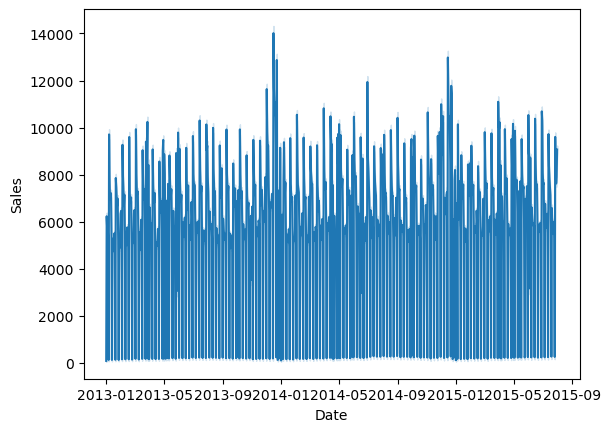

In [26]:
#graphique ventes sur la période

sns.lineplot(df_merge, x="Date", y="Sales")

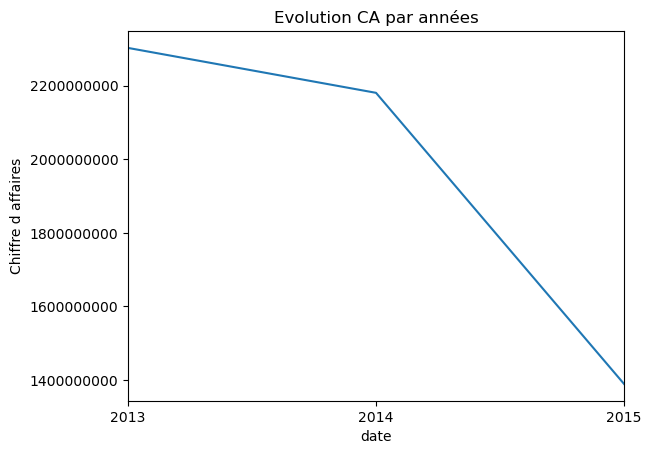

In [27]:
#graphique ventes par années en volume

df_merge2 = df_merge

# Convertion colonne "Date" en index datetime
df_merge2.set_index("Date", inplace=True)

# méthode resample pour agréger les données par mois et calculer la somme
df_merge2_resampled = df_merge2["Sales"].resample("Y").sum()

# graphique
df_merge2_resampled.plot()
plt.ticklabel_format(style='plain', axis='y')
plt.title("Evolution CA par années")
plt.xlabel('date')
plt.ylabel('Chiffre d affaires')

# Afficher le graphique
plt.show()

In [28]:
# volume ca 2014 < ca 2013 (en milliard)

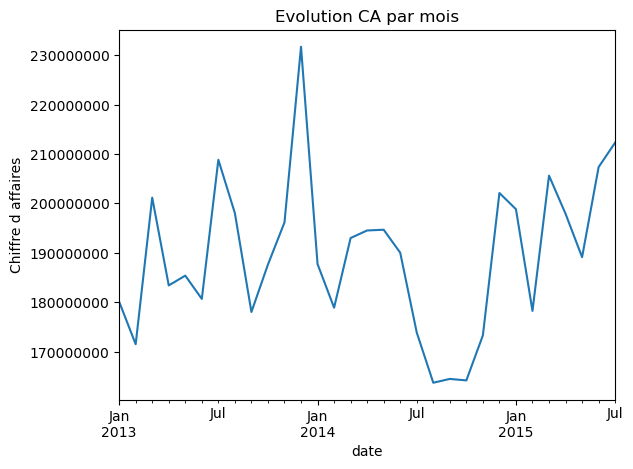

In [29]:
#graphique ventes par mois en volume

# méthode resample pour agréger les données par mois et calculer la somme
df_merge2_resampled2 = df_merge2["Sales"].resample("M").sum()

# graphique
df_merge2_resampled2.plot()
plt.ticklabel_format(style='plain', axis='y')
plt.title("Evolution CA par mois")
plt.xlabel('date')
plt.ylabel('Chiffre d affaires')

# Afficher le graphique
plt.show()

In [30]:
# volume ca 2014 < ca 2013 (en centaines de millions)

## 3.2 graphiques des ventes en moyenne

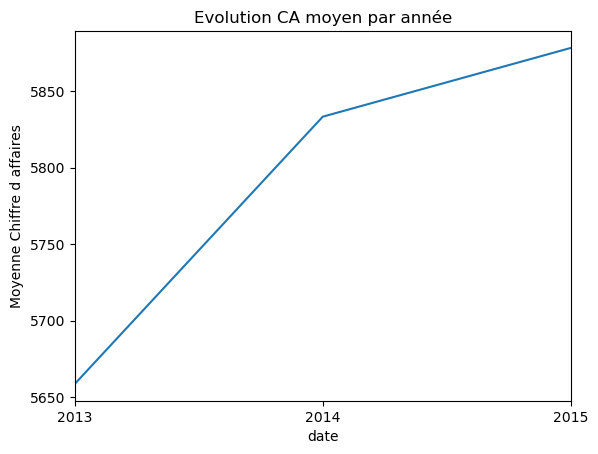

In [32]:
#graphique ventes par années en moyenne / jour

# Utiliser la méthode resample pour agréger les données par année et calculer la moyenne
df_merge2_resampled3 = df_merge2["Sales"].resample("Y").mean()

# graphique
df_merge2_resampled3.plot()
plt.title("Evolution CA moyen par année")
plt.xlabel('date')
plt.ylabel('Moyenne Chiffre d affaires')

# graphique
plt.show()

In [33]:
# moyenne ca 2014 > moyenne ca 2013 donc moins de jour de ventes en 2014

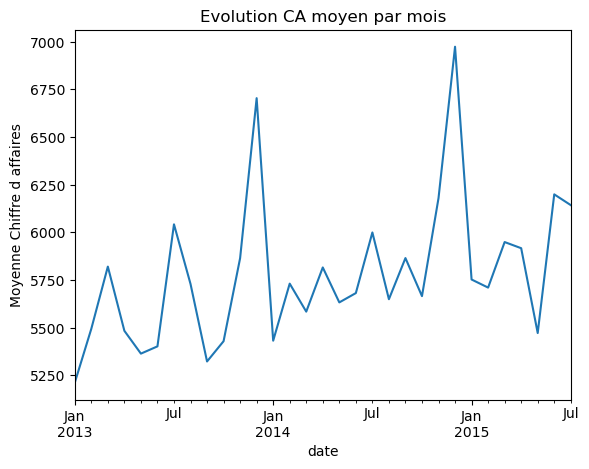

In [34]:
#graphique ventes par mois en moyenne / jour

# méthode resample pour agréger les données par mois et calculer la moyenne
df_merge2_resampled4 = df_merge2["Sales"].resample("M").mean()

# graphique
df_merge2_resampled4.plot()
plt.title("Evolution CA moyen par mois")
plt.xlabel('date')
plt.ylabel('Moyenne Chiffre d affaires')

# Afficher le graphique
plt.show()

In [35]:
# juillet 2013 2014 2015 pic à la hausse: vacances dété, blessures, insolation, fêtes, sports donc conso medicaments et autres en pharmacies
# décembre 20132 2014, pic à la hausse: fin d'année, souvents beaucoup de personnes malades, grippes etc

## 3.3 saisonnalité

### saisonnalité ventes en volume sur la période

<function show at 0x000001F4BABB8C20>


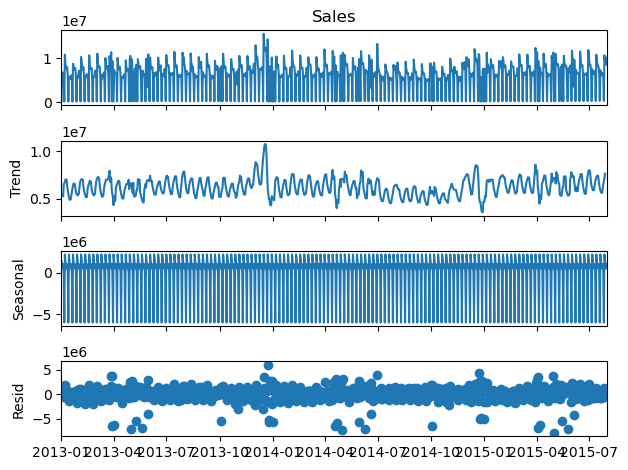

In [38]:
# on peut utiliser que le modele "additive" car nous avons des valeurs avec 0
#egalement il faut definir la frequence de l'index malgré que les dates soient remplies
#on doit avoir des dates uniques en index donc agréger le dataframe par date

from statsmodels.tsa.seasonal import seasonal_decompose


saisonnalité = df_merge2.groupby(df_merge2.index).agg({'Sales': 'sum'})
saisonnalité = saisonnalité["Sales"].asfreq('D')


decompose_result_mult = seasonal_decompose(saisonnalité, model="additive")

fig = decompose_result_mult.plot()

#les graphiques s'affichent 2 fois automatiquement (environnement jupyther) je ferme le 1er graphique)

plt.close(fig)

#je réouvre le graphique manuellement

decompose_result_mult.plot()

print(plt.show)

In [39]:
#valeurs en millions, plus simple à expliciter en valeur de moyenne par jour

### saisonnalité ventes en moyenne sur la période

<function show at 0x000001F4BABB8C20>


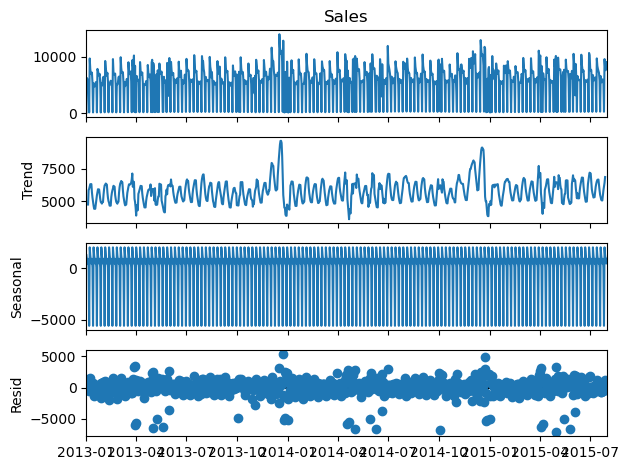

In [41]:
saisonnalité_moy = df_merge2.groupby(df_merge2.index).agg({'Sales': 'mean'})
saisonnalité_moy = saisonnalité_moy["Sales"].asfreq('D')


decompose_result_mult = seasonal_decompose(saisonnalité_moy, model="additive")

fig = decompose_result_mult.plot()

#les graphiques s'affichent 2 fois automatiquement (environnement jupyther) je ferme le 1er graphique)

plt.close(fig)

#je réouvre le graphique manuellement

decompose_result_mult.plot()

print(plt.show)

In [42]:
# interprétation

#tendance: légérement fluctuante, chaque année il semble y avoir une légere phase de croissance puis un léger déclin
#saisonnalité: variations régulières, d'amplitudes élevées et répétées sur l'ensemble de la période 
#résidus: regroupés vers l'axe d'abscisse 0 mais la graduation étant grandes(-5000; +5000), celà veut dire qu'il y a de nombreuses observations éloignées, non captées par la tendance

### 3.3 boxplot pour voir la répartition des valeurs

Text(0.5, 1.0, 'Répartition des ventes par magasins')

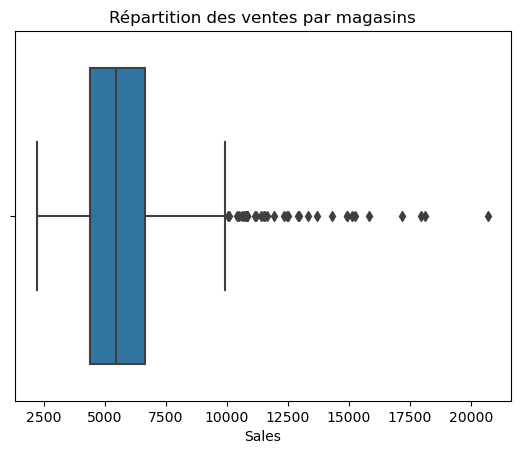

In [44]:
#boxplot sur df

# impossible à executer, trop de données et calculs pour un boxplot sur 1 million de lignes
#code:
#df_colonne_sales= df_merge2[["Sales"]]
#px.box(df_colonne_sales, y=df_colonne_sales["Sales"], title="répartition valeurs ventes")

# je vais faire un boxplot qui regroupe les ventes par magasins pour me faire une idée

#boxplot des ca par mag
ca_par_mag = df_merge2.groupby('Store')['Sales'].mean()
sns.boxplot(x=ca_par_mag)
plt.title("Répartition des ventes par magasins")


In [45]:
# la valeur médiane du CA est 5500€ 
# 50% des ventes se situent entre 4500€ et 6500€

### 3.4 corrélations entre les variables (heatmap)

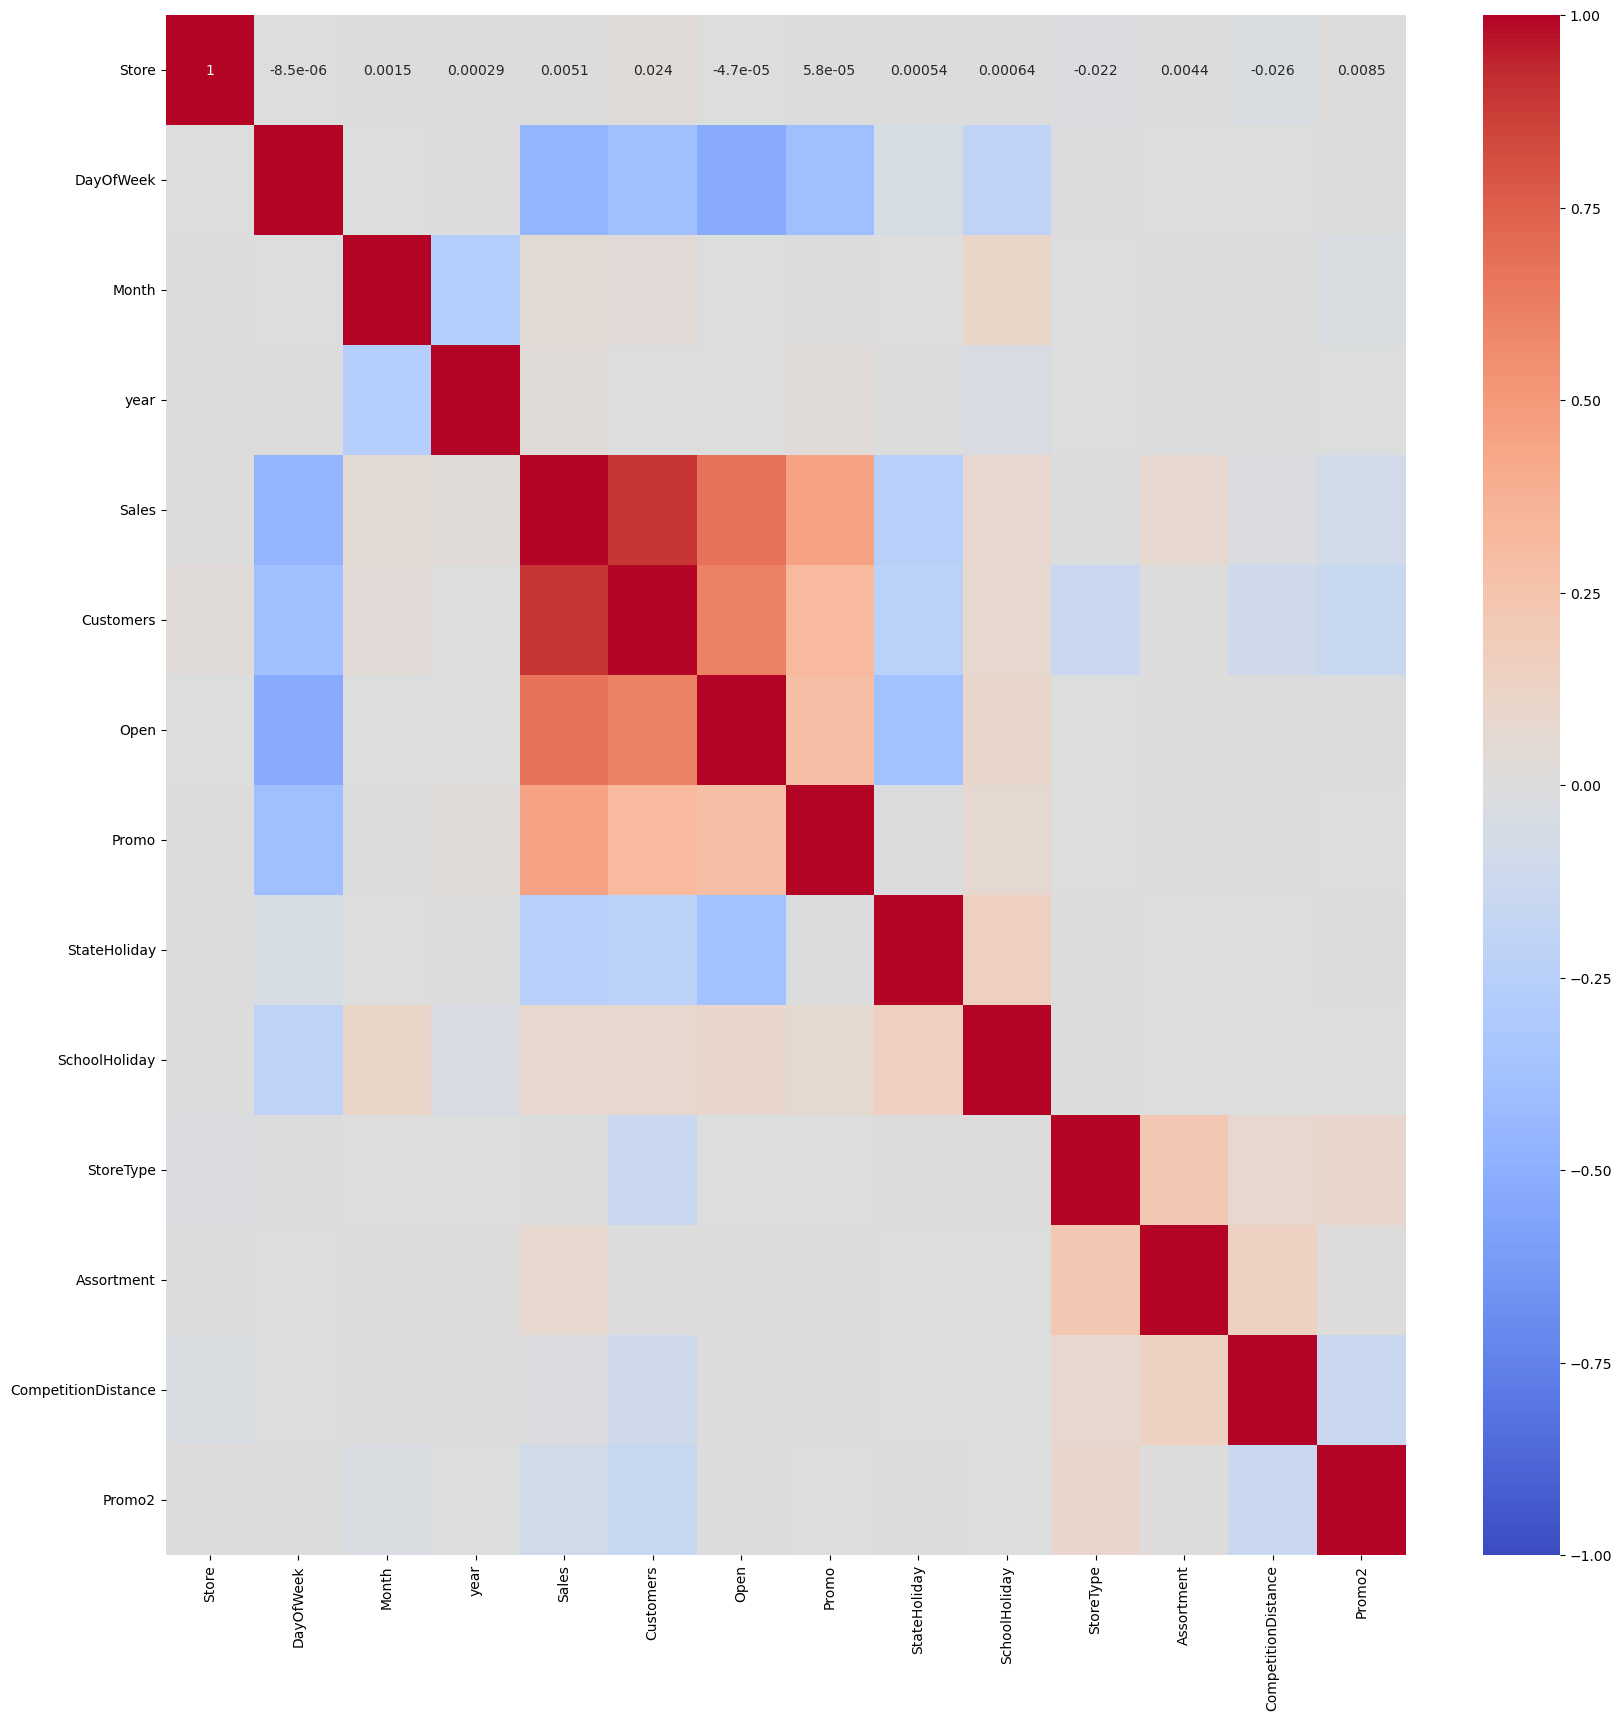

In [47]:
# suppresion de la colonne "promointerval" de type texte, le heatmap n'accepte pas cette colonne

df_merge3 = df_merge2.drop('PromoInterval', axis=1)

#egaelement suppresion de la colonne que j'ai créé "concurrent" qui est toujours égale à 1 et s'affiche de couleur blanche uniforme dans le heatmap

df_merge3 = df_merge3.drop('concurrent', axis=1)

#malgrés des modifications dans les parametres du heatmap les valeurs de correlations ne s'affichent pas dans les cellules mais les informations sont là

correlations = df_merge3.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Affichage du graphique
plt.show()

In [48]:
#corrélation CA

#  Corrélation tres forte et la plus élevée entre CA et Nombre clients
# egalement forte/bonne corrélation en CA et jour d'ouvertures magasins et entre CA et Promo"1" (régulière)
# corrélation lègère mais existante entre CA et les vacances et le type de gamme de produis proposés 

#corrélation lègère mais existante entre périodes de vacances et fermetures d'écoles 
#(j'ai agrégé les types de vacances par le fait qu'on soit en vacances ou non donc c'est normal que la corrélation soit moins forte)

# corrélation médium ou lègère entre type de magasins et assortment ainsi que competition distance et promo 2
# les differents types de magasins proposent donc des gammes de produits differentes, ont des distances de concurrents différentes ainsi qu'une utilisation des promos spécifiques
# qui les caractèrisent.


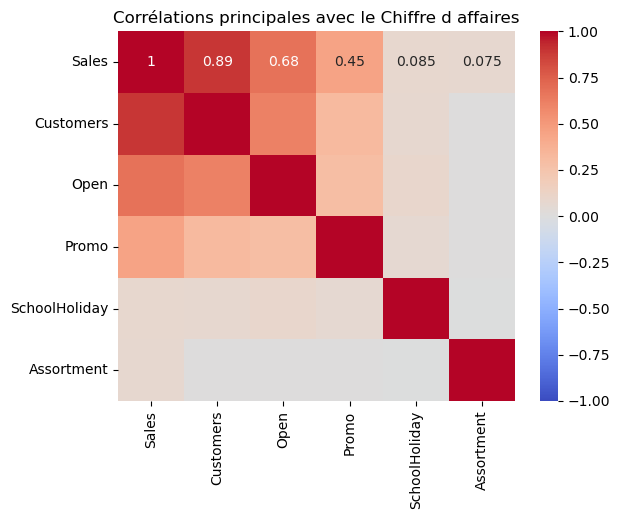

In [49]:
#zoom corrélation CA

corrélations2 = df_merge3[["Sales","Customers","Open","Promo","SchoolHoliday", "Assortment"]].corr()

sns.heatmap(corrélations2, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Corrélations principales avec le Chiffre d affaires')

# Affichage du graphique
plt.show()

In [50]:
#indice de corrélation à 0.89 entre ca et customers

#indice de corrélation à 0.45 entre ca et promo

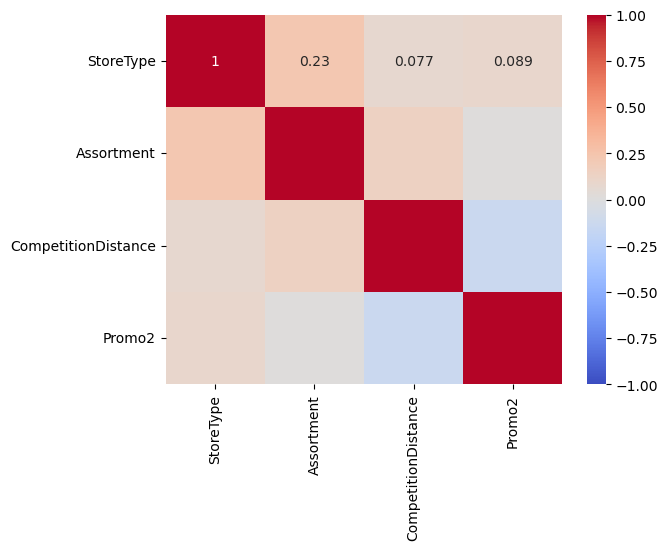

In [51]:
#zoom corrélation Storetype

corrélations3 = df_merge3[["StoreType","Assortment","CompetitionDistance","Promo2"]].corr()

sns.heatmap(corrélations3, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Affichage du graphique
plt.show()

In [52]:
# corrélation existante entre le type de magasins et les gammes de produis: 0.23

# 4. Caractérisez les différentes typologies de magasin

## 4.1 Caractéristiques des groupes de magasins a,b,c, d du StoreType

In [55]:
# calculs des paramètres moyens définissant les groupes de magasins

#nombre magasins par classe
mag_par_type = df_merge2.groupby(["StoreType"])["Store"].nunique()
#chiffres d'affaires moyen par classe
ca_par_type = df_merge2.groupby(["StoreType"])["Sales"].mean()
#nombre clients moyen par classe
customer_par_type = df_merge2.groupby(["StoreType"])["Customers"].mean()
#pratique promo régulière ou non par classe
promo_par_type = df_merge2.loc[df_merge2['Open'] == 1].groupby(["StoreType"])["Promo"].mean()
#pratique promo ponctuelle ou non par classe
promo2_par_type = df_merge2.loc[df_merge2['Open'] == 1].groupby(["StoreType"])["Promo2"].mean()
#typologie assortment par classe
assortment_par_type = df_merge2.loc[df_merge2['Open'] == 1].groupby(["StoreType"])["Assortment"].mean()
# présencee concurrents par type
présence_concurrents_par_type = df_merge2.groupby(['StoreType'])['concurrent'].mean()
#distance moyenne concurrents
distance_concurrents_par_type = df_merge2.groupby(["StoreType"])["CompetitionDistance"].mean()
#regrouper dans un dataframe
tableau_type_mag_df = pd.DataFrame({
    'Nombre de magasins': mag_par_type,
    'CA moyen': ca_par_type,
    'Nombre moyen de clients': customer_par_type,
    'Pourcentage Promo régulière': promo_par_type,
    'Pourcentage Promo ponctuelle': promo2_par_type,
    'type Assortment': assortment_par_type,
    'Présence concurrent': présence_concurrents_par_type,
    'Distance concurrent': distance_concurrents_par_type
})
print(tableau_type_mag_df )

           Nombre de magasins  CA moyen  Nombre moyen de clients  \
StoreType                                                          
1                         602   5738.18                   659.03   
2                          17  10058.84                  1987.72   
3                         148   5723.63                   673.27   
4                         348   5641.82                   501.43   

           Pourcentage Promo régulière  Pourcentage Promo ponctuelle  \
StoreType                                                              
1                                 0.45                          0.47   
2                                 0.38                          0.29   
3                                 0.45                          0.50   
4                                 0.45                          0.57   

           type Assortment  Présence concurrent  Distance concurrent  
StoreType                                                             
1               

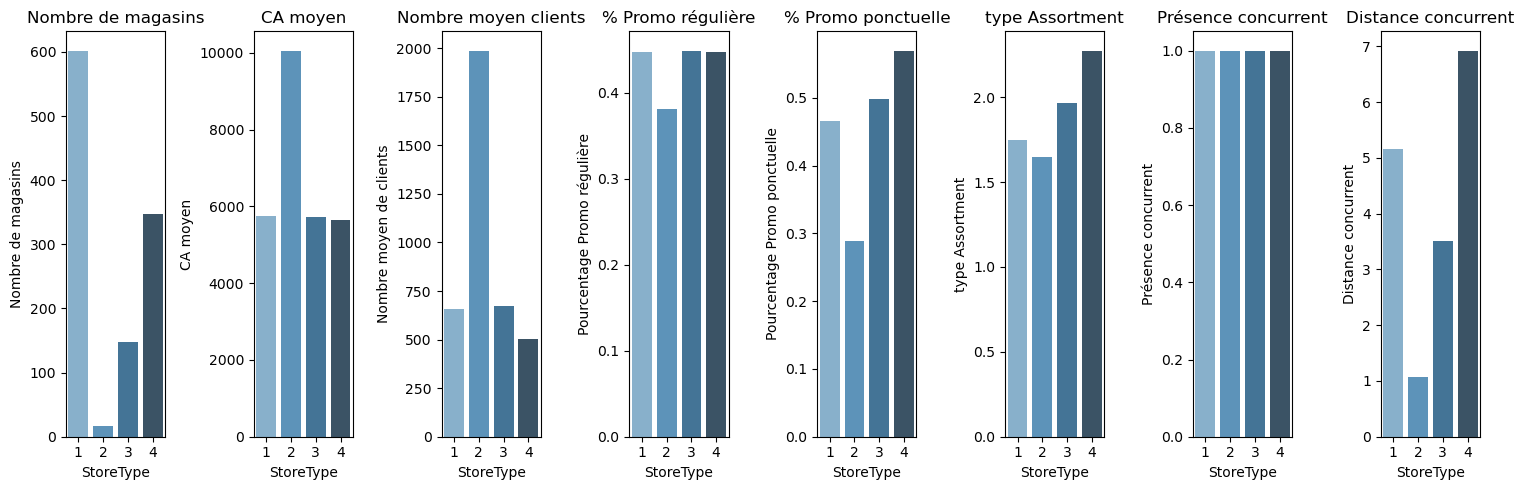

In [56]:
# graphiques en definissant une figure et des sous graphiques (subplots)
plt.figure(figsize=(15, 5))

plt.subplot(1, 8, 1)
sns.barplot(x=tableau_type_mag_df.index, y=tableau_type_mag_df['Nombre de magasins'], palette='Blues_d')
plt.title('Nombre de magasins')

plt.subplot(1, 8, 2)
sns.barplot(x=tableau_type_mag_df.index, y=tableau_type_mag_df['CA moyen'], palette='Blues_d')
plt.title('CA moyen')

plt.subplot(1, 8, 3)
sns.barplot(x=tableau_type_mag_df.index, y=tableau_type_mag_df['Nombre moyen de clients'], palette='Blues_d')
plt.title('Nombre moyen clients')

plt.subplot(1, 8, 4)
sns.barplot(x=tableau_type_mag_df.index, y=tableau_type_mag_df['Pourcentage Promo régulière'], palette='Blues_d')
plt.title('% Promo régulière')

plt.subplot(1, 8, 5)
sns.barplot(x=tableau_type_mag_df.index, y=tableau_type_mag_df['Pourcentage Promo ponctuelle'], palette='Blues_d')
plt.title('% Promo ponctuelle')

plt.subplot(1, 8, 6)
sns.barplot(x=tableau_type_mag_df.index, y=tableau_type_mag_df['type Assortment'], palette='Blues_d')
plt.title('type Assortment')

plt.subplot(1, 8, 7)
sns.barplot(x=tableau_type_mag_df.index, y=tableau_type_mag_df['Présence concurrent'], palette='Blues_d')
plt.title('Présence concurrent')

plt.subplot(1, 8, 8)
sns.barplot(x=tableau_type_mag_df.index, y=tableau_type_mag_df['Distance concurrent'], palette='Blues_d')
plt.title('Distance concurrent')

# Ajuster l'espace entre les subplots
plt.tight_layout()
# Afficher les subplots
plt.show()

In [57]:
# le CA le plus élévé est pour le StoreType N°2 est celà est dû au nombre moyen de clients, on peut voir que la concurrence ne joue pas trop, c'est meme la classe de magasin qui a les concurrents les plus proches
# également on voit que le ca moyen des groupes 1,3,4 sont quasiment aussi importants alors que les catégories 3 et 4 ont 4 fois ou 2 fois moins de magasins par groupe avec nombre de clients relativement proches
# un autre facteur doit influer sur le ca, les promos regulieres ou ponctuelles sont quasiment similaires pour les groupes 3 et 4
# par contre le type d'assortement est plus elevés pour les magasins 3 et 4, ce facteur semble donc jouer, etre corrélé au ca moyen

In [58]:
#mag et distance moyenne storetype 2

df_merge2[df_merge2["StoreType"] == 2].groupby('Store')['CompetitionDistance'].mean()

Store
85     1.87
259    0.21
262    1.18
274    3.64
335    0.09
353    0.90
423    1.27
494    1.26
512    0.59
562    1.21
676    1.41
682    0.15
733    0.86
769    0.84
948    1.43
1081   0.40
1097   0.72
Name: CompetitionDistance, dtype: float64

## 4.2 évolution chiffre d'affaire par types de magasins 

### Evolution CA par mois en moyenne

C:\Users\grego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\grego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


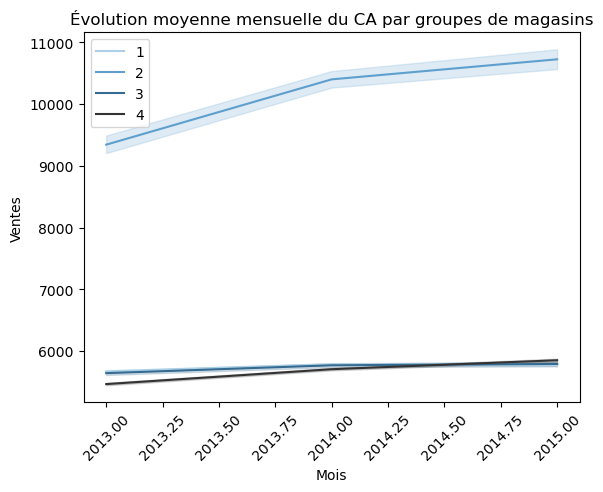

In [61]:
#evolution CA par mois en moyenne

# Agréger les ventes par mois
#création colonne "year_month"
df_merge2["year_month"] = df_merge2.index.to_period("M")
#conversion type period en datetime
df_merge2["year_month"] = df_merge2["year_month"].dt.to_timestamp()

# Tracer le graphique (par defaut valeurs ventes sort en moyenne)
sns.lineplot(data=df_merge2, x="year", y="Sales", hue='StoreType', palette='Blues_d')

# Ajouter un titre et des labels d'axe
plt.title("Évolution moyenne mensuelle du CA par groupes de magasins")
plt.xlabel("Mois")
plt.ylabel("Ventes")

# Afficher la légende
plt.legend()

# Faire pivoter les ticklabels sur l'axe des x pour plus de lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

In [62]:
# on voit que pour chaque type de magasin les ventes sont à la hausse sur l'ensemble de la période
#cette hausse correspond à la hausse des ventes vue dans graphiques de  l'analyse exploratoire de l'étape 3.1 "graphiques en volumes de ventes"


### Evolution CA par année

C:\Users\grego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\grego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


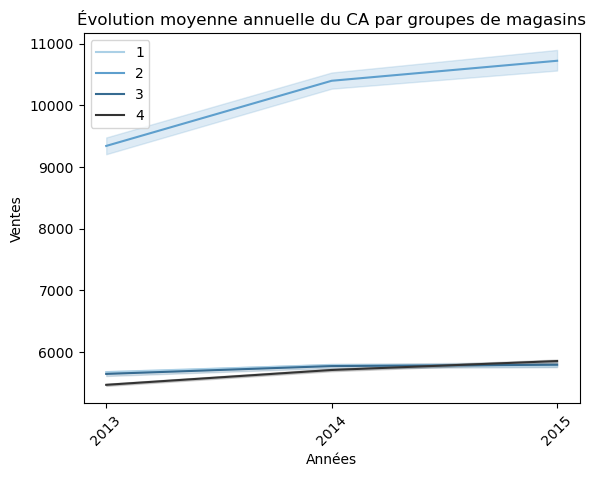

In [64]:
#evolution CA par année

# Tracer le graphique
sns.lineplot(data=df_merge2, x="year", y="Sales", hue='StoreType', palette='Blues_d')

# Ajouter un titre et des labels d'axe
plt.title("Évolution moyenne annuelle du CA par groupes de magasins")
plt.xlabel("Années")
plt.ylabel("Ventes")

# Afficher la légende
plt.legend()

# Faire pivoter les ticklabels sur l'axe des x pour plus de lisibilité
plt.xticks(rotation=45)
plt.xticks([2013, 2014, 2015])

# Afficher le graphique
plt.show()

### Variations des ventes sur la période

Text(0.5, 1.0, 'Variations ventes type de magasins')

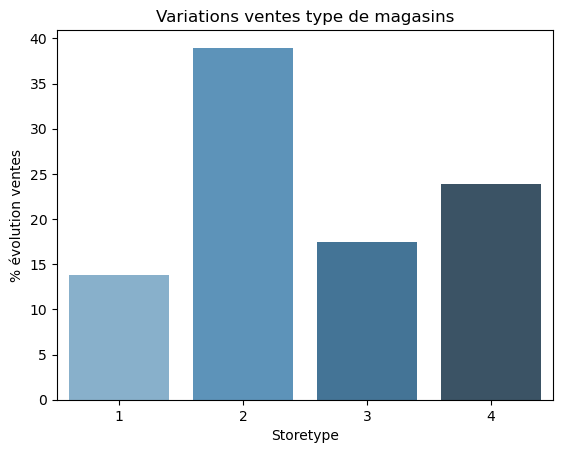

In [66]:
# variation des ventes des types de magasins sur la période:

# CA moyen premiere date
premiere_date = df_merge2.loc[df_merge2['year_month'] == "2013-01-01"].groupby(["StoreType"])["Sales"].mean()
# CA Moyen derniere date
derniere_date = df_merge2.loc[df_merge2['year_month'] == "2015-07-01"].groupby(["StoreType"])["Sales"].mean()

# variation

variation_ventes = ((derniere_date - premiere_date) / premiere_date)*100

#graphique variations

tableau_variations_df = pd.DataFrame({
    'Storetype': variation_ventes.index,
    '% évolution ventes': variation_ventes,
})
tableau_variations_df.reset_index(drop=True, inplace=True)

    
sns.barplot(x= 'Storetype', y ='% évolution ventes', data= tableau_variations_df, palette='Blues_d')
plt.title("Variations ventes type de magasins")


In [67]:
# les variation des store type 1,3 et 4 ont une augmentation située entre 15 et 20% environ
# alors que la variation du store type 2 a une augmentation située vers 40%

## 4.3 relation CA quotidien et nombre clients quotiden 

In [69]:
#prépa données

#ca moyen par mois
ca_moyen_periode = df_merge2.groupby(["year_month"])["Sales"].mean()

#nombre moyen clients par mois
nbr_moyen_clients = df_merge2.groupby(["year_month"])["Customers"].mean()

#regrouper dans un dataframe
tableau_relation_ca_clients_df = pd.DataFrame({
    'CA moyen': ca_moyen_periode,
    'Nbr clients moyen': nbr_moyen_clients
})
print(tableau_relation_ca_clients_df)

            CA moyen  Nbr clients moyen
year_month                             
2013-01-01   5211.56             589.64
2013-02-01   5494.37             616.41
2013-03-01   5820.35             635.60
2013-04-01   5483.75             624.29
2013-05-01   5364.13             599.56
2013-06-01   5402.16             612.05
2013-07-01   6042.06             661.71
2013-08-01   5729.57             645.57
2013-09-01   5322.99             608.37
2013-10-01   5429.26             618.29
2013-11-01   5864.60             644.06
2013-12-01   6703.62             690.85
2014-01-01   5431.88             604.46
2014-02-01   5731.09             639.73
2014-03-01   5584.26             621.63
2014-04-01   5815.99             638.14
2014-05-01   5632.67             622.18
2014-06-01   5681.53             615.24
2014-07-01   5999.40             665.84
2014-08-01   5649.42             638.83
2014-09-01   5865.10             665.52
2014-10-01   5665.56             646.37
2014-11-01   6179.25             666.18


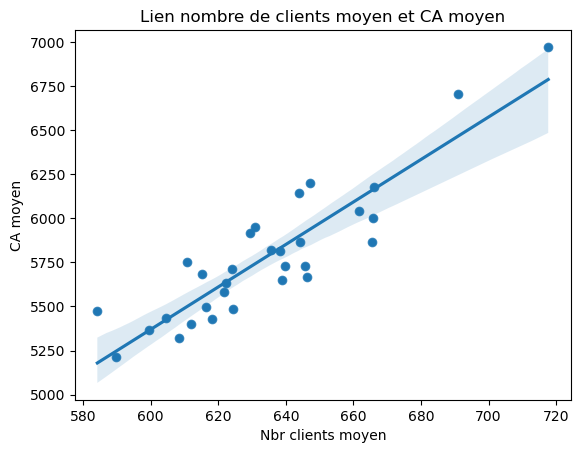

In [70]:
#faire un graphique ca et client moyen

# Tracer le graphique
sns.scatterplot(data=tableau_relation_ca_clients_df, x='Nbr clients moyen', y='CA moyen')

# Ajouter des labels aux axes
plt.xlabel('Nombre quotidien moyen de clients')
plt.ylabel('Chiffre d\'affaires quotidien moyen')
plt.title("Lien nombre de clients moyen et CA moyen")

# Ajouter une droite de régression linéaire
sns.regplot(data=tableau_relation_ca_clients_df, x='Nbr clients moyen', y='CA moyen')

# Afficher le graphique
plt.show()

In [71]:
# corrélation positive entre les deux variables, lors que le nombre de cliens augmente, le ca augmente
# la relation semble à peu prés proportionnelle, chaque augmentation de client génére une augmentation de ca, chaque client semble contribuer de maniere constante au ca

## 4.4 REGRESSION LINEAIRE

In [73]:
# il faut que j'utilise des données de ventes agrégés par magasins sinon si je prends la série temporelle, le volume est trop important
# l'anova detecte des differences significatives alors qu'elles sont tres petites à cause de la puissance statistique augmentée due à la grande quantité d'échantillon
#les p-values sont donc faibles pour des effets minimes ou pas significatif


### Regression linéaire multiple variables quantitatives

In [75]:
#definition d'un dataframe agrégé et avec les colonnes qui nous interesse

df_reg_lin = df_merge[['Month', 'year', 'Open', 'Store', 'Sales', 'Customers', 'CompetitionDistance']]
df_reg_lin['year_month'] = df_reg_lin['year'].astype(str) + '-' + df_merge['Month'].astype(str)
df_reg_lin = df_reg_lin.drop(['year', 'Month'], axis=1)

df_aggregated = df_reg_lin.groupby(['year_month', 'Store'])[['Open','Sales', 'Customers', 'CompetitionDistance']].mean().reset_index()
df_aggregated

C:\Users\grego\AppData\Local\Temp\ipykernel_3784\140725257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_lin['year_month'] = df_reg_lin['year'].astype(str) + '-' + df_merge['Month'].astype(str)


year_month  Store  Open    Sales  Customers  CompetitionDistance
0         2013-1      1  0.84  4142.94     512.87                 1.27
1         2013-1      2  0.84  3715.19     455.71                 0.57
2         2013-1      3  0.84  5343.65     590.03                14.13
3         2013-1      4  0.84  7571.39    1077.10                 0.62
4         2013-1      5  0.84  3530.39     426.23                29.91
...          ...    ...   ...      ...        ...                  ...
33480     2015-7   1111  0.87  3927.81     325.26                 1.90
33481     2015-7   1112  0.87  7312.00     580.19                 1.88
33482     2015-7   1113  0.87  5842.29     584.58                 9.26
33483     2015-7   1114  0.87 20212.52    3001.55                 0.87
33484     2015-7   1115  0.87  6115.71     405.03                 5.35

[33485 rows x 6 columns]

In [76]:
#regression lineaire multiple

reg_multi = smf.ols('Sales~Customers+CompetitionDistance', data=df_aggregated).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                 4.097e+04
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:23:09   Log-Likelihood:            -2.8346e+05
No. Observations:               33485   AIC:                         5.669e+05
Df Residuals:                   33482   BIC:                         5.670e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2116.0672    

In [77]:
# les p-values sont à 0 et le r2 à 71%
#les variables customers et competitiondistance ont donc un effet significatif sur le CA
#nous avons déjà vu le lien entre le nombre de clients et le CA précédemment
#pour la distance cà ne ressortait pas dans le heatmap

In [78]:
# faire les analyses complémentaires des resultats de cette regression lineaire est impossible, le fichier plante  malgré que les données soient agrégées par mois (tracage des graphiques leviers,
#résidus studentisés, distance de cook, colinéarité, homoscédasticité, normalité des résidus comme dans le TP 2 du cours du projet 9), le seuil des leviers est trés bas

# le lien entre le CA et le nombre de clients est déjà avéré
#nous allons regarger le lien entre le CA et la distance des concurrents comme précédemment pour la relation ca et nombre clients
#ensuite nous ferons une ANOVA pour regarder l'influence des variables qualitatives

In [79]:
# relation CA quotidien et distancecompetition quotiden

#prépa données

#ca moyen par mois
ca_moyen_periode = df_merge2.groupby(["year_month"])["Sales"].mean()

#nombre moyen clients par mois
distancecompetition_moyenne = df_merge2.groupby(["year_month"])["CompetitionDistance"].mean()

#regrouper dans un dataframe
tableau_relation_ca_distances_df = pd.DataFrame({
    'CA moyen': ca_moyen_periode,
    'distance concurrent moyenne': distancecompetition_moyenne
})
print(tableau_relation_ca_distances_df)

            CA moyen  distance concurrent moyenne
year_month                                       
2013-01-01   5211.56                         5.39
2013-02-01   5494.37                         5.39
2013-03-01   5820.35                         5.39
2013-04-01   5483.75                         5.39
2013-05-01   5364.13                         5.39
2013-06-01   5402.16                         5.39
2013-07-01   6042.06                         5.39
2013-08-01   5729.57                         5.39
2013-09-01   5322.99                         5.39
2013-10-01   5429.26                         5.39
2013-11-01   5864.60                         5.39
2013-12-01   6703.62                         5.39
2014-01-01   5431.88                         5.39
2014-02-01   5731.09                         5.39
2014-03-01   5584.26                         5.39
2014-04-01   5815.99                         5.39
2014-05-01   5632.67                         5.39
2014-06-01   5681.53                         5.39


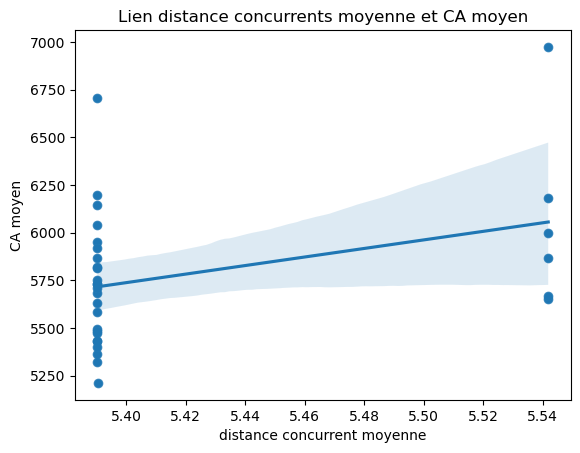

In [80]:
#faire un graphique ca et distance concurrents moyenne

# Tracer le graphique
sns.scatterplot(data=tableau_relation_ca_distances_df, x='distance concurrent moyenne', y='CA moyen')

# Ajouter des labels aux axes
plt.xlabel('distance concurrents moyenne')
plt.ylabel('Chiffre d\'affaires quotidien moyen')
plt.title("Lien distance concurrents moyenne et CA moyen")

# Ajouter une droite de régression linéaire
sns.regplot(data=tableau_relation_ca_distances_df, x='distance concurrent moyenne', y='CA moyen')

# Afficher le graphique
plt.show()

In [81]:
# plus les concurents sont proches plus nous avons de chiffre d'affaires, ce qui est logique
# comme pour le principe de centre commerciaux ou zone de restaurants, le regroupement d'entités commerciales créé plus de flux clients et donc de CA

### analyse de la variance (ANOVA)

In [83]:
#analyse des 5 facteurs qualitatifs par rapport aux ventes et avec combinaisaons gamme produits/promos et vacances/fermeture ecole

#definition d'un dataframe agrégé et avec les colonnes qui nous interesse

df_reg_lin2 = df_merge[['Month', 'year', 'Open', 'Store', 'Sales', 'Customers', 'Assortment', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance']]
df_reg_lin2['year_month'] = df_reg_lin2['year'].astype(str) + '-' + df_reg_lin2['Month'].astype(str)
df_reg_lin2 = df_reg_lin2.drop(['year', 'Month'], axis=1)

df_aggregated2 = df_reg_lin2.groupby(['year_month', 'Store'])[['Open', 'Sales', 'Customers', 'Assortment', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance']].mean().reset_index()
df_aggregated2

anova_mult_facteurs= smf.ols('Sales~Customers+Assortment+Promo*Promo2+StateHoliday*SchoolHoliday+CompetitionDistance', data=df_aggregated2).fit()
print(anova_mult_facteurs.summary())
sm.stats.anova_lm(anova_mult_facteurs)

C:\Users\grego\AppData\Local\Temp\ipykernel_3784\3377159113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_lin2['year_month'] = df_reg_lin2['year'].astype(str) + '-' + df_reg_lin2['Month'].astype(str)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     9820.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:23:10   Log-Likelihood:            -2.8255e+05
No. Observations:               33485   AIC:                         5.651e+05
Df Residuals:                   33475   BIC:                         5.652e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

df          sum_sq         mean_sq        F  \
Customers                      1.00 106945373165.81 106945373165.81 85546.51   
Assortment                     1.00   2445446270.56   2445446270.56  1956.13   
Promo                          1.00     49737767.49     49737767.49    39.79   
Promo2                         1.00     29479967.88     29479967.88    23.58   
Promo:Promo2                   1.00       422030.33       422030.33     0.34   
StateHoliday                   1.00     54340659.46     54340659.46    43.47   
SchoolHoliday                  1.00     23436446.41     23436446.41    18.75   
StateHoliday:SchoolHoliday     1.00    104732080.58    104732080.58    83.78   
CompetitionDistance            1.00    837974334.63    837974334.63   670.30   
Residual                   33475.00  41848536185.47      1250142.98      NaN   

                            PR(>F)  
Customers                     0.00  
Assortment                    0.00  
Promo                         0.00  
Promo2                        0.00  
Promo:Promo2                  0.56  
StateHoliday                  0.00  
SchoolHoliday                 0.00  
StateHoliday:SchoolHoliday    0.00  
CompetitionDistance           0.00  
Residual                       NaN

In [84]:
# on enleve la variable la moins significative SchoolHoliday à p-values = 1

anova_mult_facteurs= smf.ols('Sales~Customers+Assortment+Promo*Promo2+StateHoliday+CompetitionDistance', data=df_aggregated2).fit()
print(anova_mult_facteurs.summary())
sm.stats.anova_lm(anova_mult_facteurs)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 1.258e+04
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:23:10   Log-Likelihood:            -2.8260e+05
No. Observations:               33485   AIC:                         5.652e+05
Df Residuals:                   33477   BIC:                         5.653e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1264.0839    

df          sum_sq         mean_sq        F  PR(>F)
Customers               1.00 106945373165.81 106945373165.81 85298.96    0.00
Assortment              1.00   2445446270.56   2445446270.56  1950.47    0.00
Promo                   1.00     49737767.49     49737767.49    39.67    0.00
Promo2                  1.00     29479967.88     29479967.88    23.51    0.00
Promo:Promo2            1.00       422030.33       422030.33     0.34    0.56
StateHoliday            1.00     54340659.46     54340659.46    43.34    0.00
CompetitionDistance     1.00    842182769.45    842182769.45   671.72    0.00
Residual            33477.00  41972496277.63      1253771.13      NaN     NaN

In [85]:
# on enleve la variable la moins significative: fusion Promo et Promo 2 à p-values: 0.445 et 0.669

anova_mult_facteurs= smf.ols('Sales~Customers+Assortment+Promo+Promo2+StateHoliday+CompetitionDistance', data=df_aggregated2).fit()
print(anova_mult_facteurs.summary())
sm.stats.anova_lm(anova_mult_facteurs)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 1.467e+04
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:23:11   Log-Likelihood:            -2.8260e+05
No. Observations:               33485   AIC:                         5.652e+05
Df Residuals:                   33478   BIC:                         5.653e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1243.3847    

df          sum_sq         mean_sq        F  PR(>F)
Customers               1.00 106945373165.81 106945373165.81 85301.04    0.00
Assortment              1.00   2445446270.56   2445446270.56  1950.52    0.00
Promo                   1.00     49737767.49     49737767.49    39.67    0.00
Promo2                  1.00     29479967.88     29479967.88    23.51    0.00
StateHoliday            1.00     54483646.98     54483646.98    43.46    0.00
CompetitionDistance     1.00    842232024.78    842232024.78   671.78    0.00
Residual            33478.00  41972726065.10      1253740.55      NaN     NaN

In [86]:
# toutes les variables ont une p-values à 0.00  et semblent etre toutes significatives pour le CA
# peut etre est ce dû au dataframe que j'ai agrégé qui est encore trop diffût et créer des liens non significatifs

#en tout cas à ce niveau de test, l'anova montre que le nombre de clients, le type d'assortiments, les promotions, les vacances et la distance des concurrents sont fortement corrélées au CA

# cà semble semble cohérent pour l'assortment: plus la gamme de produits est développée, plus le client peut trouver un produit et plus d'articles peuvent etre vendues
# en période de vacances les personnes peuvent décaler leurs achats en pharmacie car ils sont en vacances ou se reposent
# à comparaison avec les p-values des variables que l'on a supprimer la promo peut et doit etre retenue

#je vais agréger le dataframe non plus par mois pour chaque magasins mais faire la moyenne globale par magasins

In [87]:
df_aggregated3 = df_reg_lin2.groupby(['Store'])[['Open', 'Sales', 'Assortment', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday']].mean().reset_index()
df_aggregated3

Store  Open    Sales  Assortment  Promo  Promo2  StateHoliday  \
0         1  0.83  3945.70        1.00   0.38    0.00          0.03   
1         2  0.83  4122.99        1.00   0.38    1.00          0.03   
2         3  0.83  5741.25        1.00   0.38    1.00          0.03   
3         4  0.83  8021.77        3.00   0.38    0.00          0.03   
4         5  0.83  3867.11        1.00   0.38    0.00          0.03   
...     ...   ...      ...         ...    ...     ...           ...   
1110   1111  0.83  4342.97        1.00   0.38    1.00          0.03   
1111   1112  0.83  8465.28        3.00   0.38    0.00          0.03   
1112   1113  0.83  5516.18        3.00   0.38    0.00          0.03   
1113   1114  0.83 17200.20        3.00   0.38    0.00          0.03   
1114   1115  0.83  5225.30        3.00   0.38    1.00          0.03   

      SchoolHoliday  
0              0.20  
1              0.18  
2              0.18  
3              0.18  
4              0.18  
...             ...  
1110           0.18  
1111           0.18  
1112           0.17  
1113           0.18  
1114           0.20  

[1115 rows x 8 columns]

In [88]:
anova_mult_facteurs= smf.ols('Sales~Promo*Promo2+Assortment+StateHoliday*SchoolHoliday', data=df_aggregated3).fit()
print(anova_mult_facteurs.summary())
sm.stats.anova_lm(anova_mult_facteurs)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     10.59
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           6.01e-13
Time:                        18:23:11   Log-Likelihood:                -10046.
No. Observations:                1115   AIC:                         2.011e+04
Df Residuals:                    1107   BIC:                         2.015e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

df        sum_sq      mean_sq     F  PR(>F)
Promo                         1.00   22184962.03  22184962.03  5.62    0.02
Promo2                        1.00  119141930.11 119141930.11 30.16    0.00
Promo:Promo2                  1.00    2905635.91   2905635.91  0.74    0.39
Assortment                    1.00   93096760.12  93096760.12 23.57    0.00
StateHoliday                  1.00   27213494.78  27213494.78  6.89    0.01
SchoolHoliday                 1.00   28278749.14  28278749.14  7.16    0.01
StateHoliday:SchoolHoliday    1.00      50886.64     50886.64  0.01    0.91
Residual                   1107.00 4372500391.58   3949864.85   NaN     NaN

In [89]:
# le r2 n'est plus du tout significatif mais je continue le test pour voir

In [90]:
# on enleve la variable la moins significative SchoolHoliday à p-values = 0.901 (cohérent avec l'anova sur dataframe par mois) 

anova_mult_facteurs= smf.ols('Sales~Promo*Promo2+Assortment+StateHoliday', data=df_aggregated3).fit()
print(anova_mult_facteurs.summary())
sm.stats.anova_lm(anova_mult_facteurs)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     13.33
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           1.22e-12
Time:                        18:23:11   Log-Likelihood:                -10050.
No. Observations:                1115   AIC:                         2.011e+04
Df Residuals:                    1109   BIC:                         2.014e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      6.97e+04   3.78e+04      1.843   

df        sum_sq      mean_sq     F  PR(>F)
Promo           1.00   22184962.03  22184962.03  5.59    0.02
Promo2          1.00  119141930.11 119141930.11 30.02    0.00
Promo:Promo2    1.00    2905635.91   2905635.91  0.73    0.39
Assortment      1.00   93096760.12  93096760.12 23.46    0.00
StateHoliday    1.00   27213494.78  27213494.78  6.86    0.01
Residual     1109.00 4400830027.36   3968286.77   NaN     NaN

In [91]:
# on enleve la variable la moins significative Promo2 à p-values = 0.449

anova_mult_facteurs= smf.ols('Sales~Promo+Assortment+StateHoliday', data=df_aggregated3).fit()
print(anova_mult_facteurs.summary())
sm.stats.anova_lm(anova_mult_facteurs)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     14.23
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           4.22e-09
Time:                        18:23:11   Log-Likelihood:                -10061.
No. Observations:                1115   AIC:                         2.013e+04
Df Residuals:                    1111   BIC:                         2.015e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.72e+04   2.13e+04      2.213   

df        sum_sq     mean_sq     F  PR(>F)
Promo           1.00   22184962.03 22184962.03  5.49    0.02
Assortment      1.00   88474670.20 88474670.20 21.88    0.00
StateHoliday    1.00   61916704.50 61916704.50 15.31    0.00
Residual     1111.00 4492796473.59  4043921.22   NaN     NaN

In [92]:
# a ce niveau l'anova montre que le type d'assortiments de produits et les vacances sont corrélées au chiffres d'affaires

#mais plus on a enlevé de variables plus la qualité du R2 s'est dégradé pour arrivé
# ce qui semble logique plus la gamme de produits est développée, plus d'articles peuvent etre vendues
# en période de vacances les personnes peuvent décaler leurs achats en pharmacie car ils sont en vacances ou se reposent
# le fait qu' un magasin pratique des promos influe également sur le chiffres d'affaires, certes la p-values est à 0.06 mais le seuil de 5% est un seuil aléatoire 
# à comparaison avec les p-values des variables que l'on a supprimer la promo peut et doit etre retenue

## récap variables influentes sur le CA

In [94]:
# je fait un récap des variables qui semblent cohérentes pour influer sur le CA à travers les tests du heatmap, regressions et caractéristiques type magasins

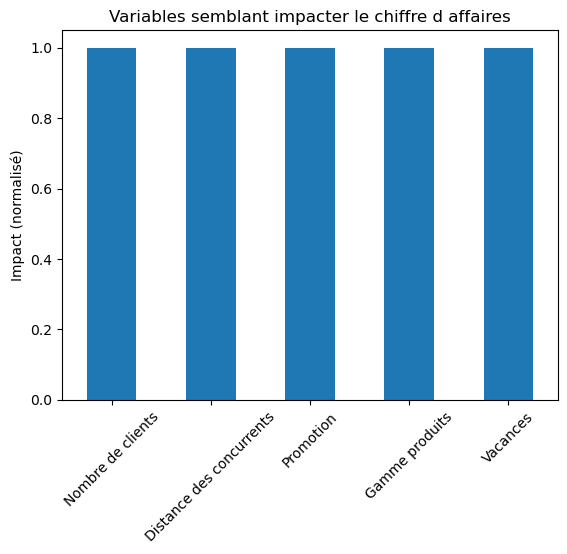

In [95]:
# récap paramètres qui semblent influents sur le CA: 

Nombre_clients = 1
Distance_Concurrents = 1
Promo = 1
Assortment = 1
StateHoliday = 1

tableau_parametres_influents_df = pd.DataFrame({
    'Nombre de clients': [Nombre_clients],
    'Distance des concurrents': [Distance_Concurrents],
    'Promotion': [Promo],
    'Gamme produits': [Assortment],
    'Vacances': [StateHoliday],
}, index=['Influence'])

# Transposer le DataFrame, variables en index
tableau_parametres_influents_df = tableau_parametres_influents_df.T

# histogramme
tableau_parametres_influents_df.plot(kind='bar', legend=False)
plt.title('Variables semblant impacter le chiffre d affaires')
plt.ylabel('Impact (normalisé)')
plt.xticks(rotation=45)  # Rotation des étiquettes pour les rendre lisibles
plt.show()


## 4.4 catagoriser magasins par clustering, faire 4 groupes selon criteres


In [97]:
# on va utiliser un dataframe agrégé par magasins

df_aggregated4 = df_reg_lin2.groupby(['Store'])[['Open', 'Sales', 'Customers', 'CompetitionDistance', 'Assortment', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday']].mean().reset_index()
df_aggregated4


Store  Open    Sales  Customers  CompetitionDistance  Assortment  Promo  \
0         1  0.83  3945.70     467.65                 1.27        1.00   0.38   
1         2  0.83  4122.99     486.05                 0.57        1.00   0.38   
2         3  0.83  5741.25     620.29                14.13        1.00   0.38   
3         4  0.83  8021.77    1100.06                 0.62        3.00   0.38   
4         5  0.83  3867.11     444.36                29.91        1.00   0.38   
...     ...   ...      ...        ...                  ...         ...    ...   
1110   1111  0.83  4342.97     373.55                 1.90        1.00   0.38   
1111   1112  0.83  8465.28     693.50                 1.88        3.00   0.38   
1112   1113  0.83  5516.18     596.76                 9.26        3.00   0.38   
1113   1114  0.83 17200.20    2664.06                 0.87        3.00   0.38   
1114   1115  0.83  5225.30     358.69                 5.35        3.00   0.38   

      Promo2  StateHoliday  SchoolHoliday  
0       0.00          0.03           0.20  
1       1.00          0.03           0.18  
2       1.00          0.03           0.18  
3       0.00          0.03           0.18  
4       0.00          0.03           0.18  
...      ...           ...            ...  
1110    1.00          0.03           0.18  
1111    0.00          0.03           0.18  
1112    0.00          0.03           0.17  
1113    0.00          0.03           0.18  
1114    1.00          0.03           0.20  

[1115 rows x 10 columns]

In [98]:
# import packages pour le k-means

#packages préparations données
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#packages clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [99]:
# étape scalling
# les clusters et pca sont sensibles aux outliers donc on normalise en centrant et réduisant les données

#instancier le scaling
scaler = StandardScaler()

# Entrainer le scaler 
scaler.fit(df_aggregated4)

# on transforme les données
X_scaled = scaler.transform(df_aggregated4)
X_scaled[:10]

array([[-1.73049809, -0.02828801, -0.88857955, -0.50826008, -0.53828961,
        -0.93444821,  0.43851027, -1.02451567, -0.50314931,  1.97454904],
       [-1.72739128,  0.09700518, -0.80190926, -0.4504817 , -0.62973862,
        -0.93444821,  0.43851027,  0.97607097, -1.01035892, -0.06574951],
       [-1.72428446, -0.11181681, -0.01078783, -0.02892819,  1.14175934,
        -0.93444821,  0.43851027,  0.97607097,  0.0040603 ,  0.16966955],
       [-1.72117764,  0.09700518,  1.10409022,  1.47768346, -0.62320655,
         1.07890397,  0.43851027, -1.02451567, -1.26396372,  0.40508862],
       [-1.71807082, -0.11181681, -0.92700211, -0.58138314,  3.20328131,
        -0.93444821,  0.43851027, -1.02451567,  0.51126991,  0.3266156 ],
       [-1.714964  , -0.07005241, -0.58710703, -0.32504407, -0.6637054 ,
        -0.93444821,  0.43851027, -1.02451567,  0.51126991,  0.3266156 ],
       [-1.71185718,  0.18053398,  0.77905589,  0.50864878,  2.43119038,
         1.07890397,  0.43851027, -1.02451567

In [100]:
# check moyenne et ecart type à 0 et 1

pd.DataFrame(X_scaled).describe().round(2)

0       1       2       3       4       5       6       7       8  \
count 1115.00 1115.00 1115.00 1115.00 1115.00 1115.00 1115.00 1115.00 1115.00   
mean     0.00   -0.00    0.00    0.00    0.00   -0.00    0.00   -0.00   -0.00   
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   
min     -1.73   -6.29   -1.72   -1.35   -0.70   -0.93   -2.28   -1.02   -1.51   
25%     -0.87   -0.22   -0.66   -0.57   -0.61   -0.93    0.44   -1.02   -1.01   
50%      0.00   -0.11   -0.15   -0.21   -0.40   -0.93    0.44    0.98    0.00   
75%      0.87    0.01    0.43    0.28    0.19    1.08    0.44    0.98    0.51   
max      1.73    6.70    7.31    8.71    9.21    1.08    0.67    0.98    1.79   

            9  
count 1115.00  
mean    -0.00  
std      1.00  
min     -1.40  
25%     -1.01  
50%      0.17  
75%      0.33  
max      3.23

In [101]:
# les données sont préparées on peut appliquer le k-means

In [102]:
# on determine le nombre de clusters

# création liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters on calcule la distance entre les points : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    
    # On entraine
    kmeans.fit(X_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

C:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [103]:
# voir les valeurs des k-means/clusters
intertia_list

[11150.000000000002,
 8917.755020041253,
 7688.433333291832,
 6724.788676845422,
 6124.21035351483,
 5667.591134237782,
 5191.236309098038,
 4829.430159894233,
 4577.989242707233]

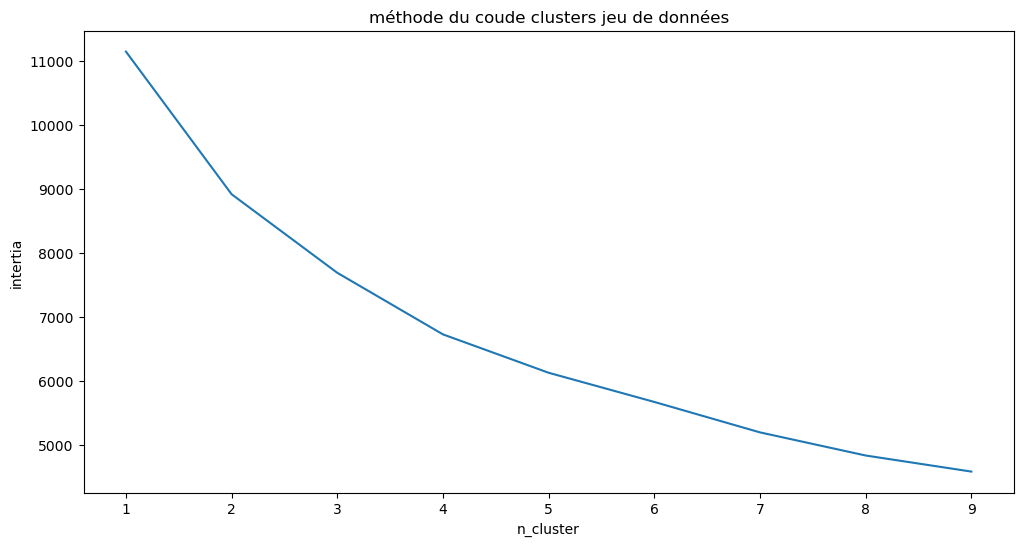

In [104]:
# on trace le graphique qui représente la méthode du coude pour voir où la cassure est la plus significative et le nombre de clusters qu'on retient

fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
plt.title('méthode du coude clusters jeu de données')
ax = plt.plot(k_list, intertia_list)

In [105]:
#je retiens la cassure à 4 clusters, c'est là que la cassure est la plus significative

In [106]:
#instancier le k-means

kmeans_états = KMeans(n_clusters=4, init = 'k-means++')

#entrainer le k-means

kmeans_états.fit(X_scaled)
    
# on récupère les clusters

clusters = kmeans_états.predict(X_scaled)

C:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [107]:
# verif nombre clusters

clusters.shape


(1115,)

In [108]:
# nombre valeurs differentes par clusters (nombre de magasins)

pd.Series.value_counts(clusters).sort_index()

0    407
1    179
2    489
3     40
Name: count, dtype: int64

In [109]:
# création d'une colonne avec les clusters dans le dataframe

df_aggregated4['clusters'] = clusters

In [110]:
#comprendre la typologie des clusters

df_clusters = df_aggregated4.groupby(['clusters']).mean().round(2)
df_clusters

Store  Open    Sales  Customers  CompetitionDistance  Assortment  \
clusters                                                                     
0        566.77  0.83  5400.97     561.54                 4.60        2.02   
1        544.97  0.82  5441.08     513.30                 4.63        1.72   
2        554.96  0.83  5802.26     648.57                 6.02        1.90   
3        564.30  0.93 10416.23    1607.81                 9.18        2.28   

          Promo  Promo2  StateHoliday  SchoolHoliday  
clusters                                              
0          0.38    1.00          0.03           0.18  
1          0.38    0.87          0.04           0.16  
2          0.38    0.00          0.03           0.18  
3          0.38    0.22          0.03           0.18

In [111]:
df_aggregated4

Store  Open    Sales  Customers  CompetitionDistance  Assortment  Promo  \
0         1  0.83  3945.70     467.65                 1.27        1.00   0.38   
1         2  0.83  4122.99     486.05                 0.57        1.00   0.38   
2         3  0.83  5741.25     620.29                14.13        1.00   0.38   
3         4  0.83  8021.77    1100.06                 0.62        3.00   0.38   
4         5  0.83  3867.11     444.36                29.91        1.00   0.38   
...     ...   ...      ...        ...                  ...         ...    ...   
1110   1111  0.83  4342.97     373.55                 1.90        1.00   0.38   
1111   1112  0.83  8465.28     693.50                 1.88        3.00   0.38   
1112   1113  0.83  5516.18     596.76                 9.26        3.00   0.38   
1113   1114  0.83 17200.20    2664.06                 0.87        3.00   0.38   
1114   1115  0.83  5225.30     358.69                 5.35        3.00   0.38   

      Promo2  StateHoliday  SchoolHoliday  clusters  
0       0.00          0.03           0.20         2  
1       1.00          0.03           0.18         0  
2       1.00          0.03           0.18         0  
3       0.00          0.03           0.18         2  
4       0.00          0.03           0.18         2  
...      ...           ...            ...       ...  
1110    1.00          0.03           0.18         0  
1111    0.00          0.03           0.18         2  
1112    0.00          0.03           0.17         2  
1113    0.00          0.03           0.18         3  
1114    1.00          0.03           0.20         0  

[1115 rows x 11 columns]

In [112]:
# calculs des paramètres moyens définissant les clusters

#nombre magasins par classe
mag_par_type = df_aggregated4.groupby(["clusters"])["Store"].nunique()
#chiffres d'affaires moyen par classe
ca_par_type = df_aggregated4.groupby(["clusters"])["Sales"].mean()
#nombre clients moyen par classe
customer_par_type = df_aggregated4.groupby(["clusters"])["Customers"].mean()
#pratique promo régulière ou non par classe
promo_par_type = df_aggregated4.groupby(["clusters"])["Promo"].mean()
#pratique promo ponctuelle ou non par classe
promo2_par_type = df_aggregated4.groupby(["clusters"])["Promo2"].mean()
#typologie assortment par classe
assortment_par_type = df_aggregated4.groupby(["clusters"])["Assortment"].mean()
#distance moyenne concurrents
distance_concurrents_par_type = df_aggregated4.groupby(["clusters"])["CompetitionDistance"].mean()
#regrouper dans un dataframe
tableau_clusters_df = pd.DataFrame({
    'Nombre de magasins': mag_par_type,
    'CA moyen': ca_par_type,
    'Nombre moyen de clients': customer_par_type,
    'Pourcentage Promo régulière': promo_par_type,
    'Pourcentage Promo ponctuelle': promo2_par_type,
    'type Assortment': assortment_par_type,
    'Distance concurrent': distance_concurrents_par_type
})

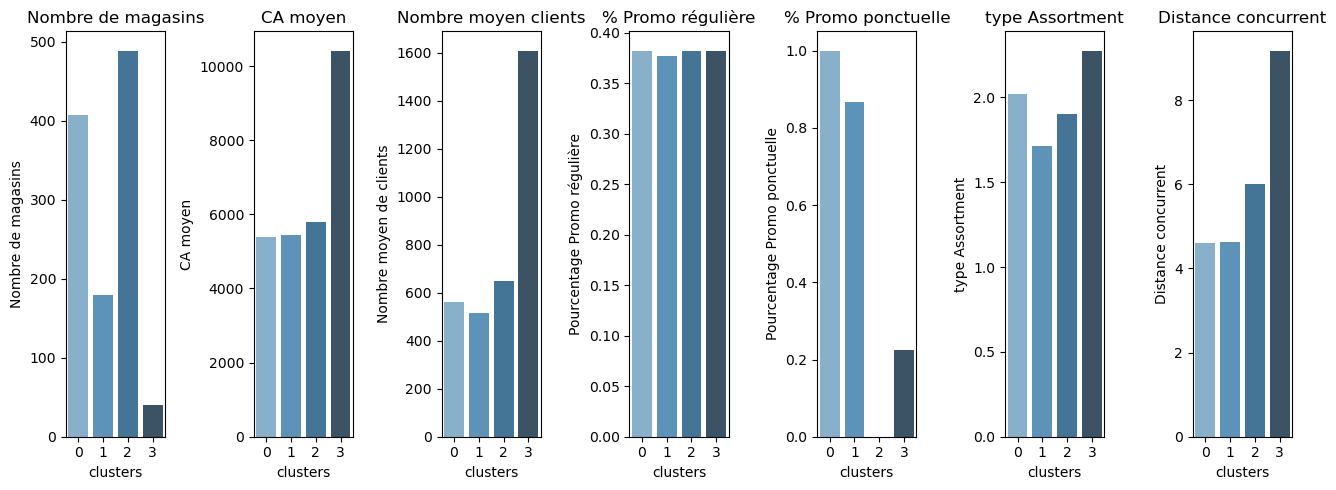

In [113]:
# graphiques en definissant une figure et des sous graphiques (subplots)
plt.figure(figsize=(15, 5))

plt.subplot(1, 8, 1)
sns.barplot(x=tableau_clusters_df.index, y=tableau_clusters_df['Nombre de magasins'], palette='Blues_d')
plt.title('Nombre de magasins')

plt.subplot(1, 8, 2)
sns.barplot(x=tableau_clusters_df.index, y=tableau_clusters_df['CA moyen'], palette='Blues_d')
plt.title('CA moyen')

plt.subplot(1, 8, 3)
sns.barplot(x=tableau_clusters_df.index, y=tableau_clusters_df['Nombre moyen de clients'], palette='Blues_d')
plt.title('Nombre moyen clients')

plt.subplot(1, 8, 4)
sns.barplot(x=tableau_clusters_df.index, y=tableau_clusters_df['Pourcentage Promo régulière'], palette='Blues_d')
plt.title('% Promo régulière')

plt.subplot(1, 8, 5)
sns.barplot(x=tableau_clusters_df.index, y=tableau_clusters_df['Pourcentage Promo ponctuelle'], palette='Blues_d')
plt.title('% Promo ponctuelle')

plt.subplot(1, 8, 6)
sns.barplot(x=tableau_clusters_df.index, y=tableau_clusters_df['type Assortment'], palette='Blues_d')
plt.title('type Assortment')

plt.subplot(1, 8, 7)
sns.barplot(x=tableau_clusters_df.index, y=tableau_clusters_df['Distance concurrent'], palette='Blues_d')
plt.title('Distance concurrent')

# Ajuster l'espace entre les subplots
plt.tight_layout()
# Afficher les subplots
plt.show()

In [114]:
#ne pas tenir compte des valeurs moyenne dans store, c'est lié aux numéros de magasins

#la classe 1 a le plus gros CA, la plus grosse fréquentation clients, l'assortiment de produits le plus élevé et la distance des concurrents la plus éloignée

#la classe 0 a ensuite se situe en 2nd position pour les mêmes critères que la classe 1 et avec une distance des concurrent moyenne par contre

# la classe 2 est la catégorie qui a presque les valeurs plus basses dans tous les critères

#la classe 3 a la distance des concurrents la plus petite et est celle qui pratatique le plus de promo de type 2 

In [115]:
tableau_clusters_df

Nombre de magasins  CA moyen  Nombre moyen de clients  \
clusters                                                          
0                        407   5400.97                   561.54   
1                        179   5441.08                   513.30   
2                        489   5802.26                   648.57   
3                         40  10416.23                  1607.81   

          Pourcentage Promo régulière  Pourcentage Promo ponctuelle  \
clusters                                                              
0                                0.38                          1.00   
1                                0.38                          0.87   
2                                0.38                          0.00   
3                                0.38                          0.23   

          type Assortment  Distance concurrent  
clusters                                        
0                    2.02                 4.60  
1                    1.72                 4.63  
2                    1.90                 6.02  
3                    2.27                 9.18

In [116]:
# c'est curieux, le cluster qui a le plus gros chiffre d'affaires en kmeans a une distance des concurrents trés élevés
#alors que par storetype le groupe de magasion qui avait le chiffre d'affaire le plus elevé avait une distance des concurrentré trés faible, la plus faibles des groupes
#je vais regarder la distance concurrents de chaque magasins du cluster 0

df_aggregated4[df_aggregated4["clusters"] == 0].groupby('Store')['CompetitionDistance'].mean()

Store
2       0.57
3      14.13
11      0.96
12      1.07
14      1.30
        ... 
1103    1.34
1105    0.33
1106    5.33
1111    1.90
1115    5.35
Name: CompetitionDistance, Length: 407, dtype: float64

In [117]:
#l'augmentation de la distance concurrents du cluster avec le plus gros CA avec la méthode kmeans est dû à l'ajout de magasins avec des bons CA mais distance concurrents trés importantes
# jusqu'à 75kms!

In [118]:
# Vérifier les magasins appartenant à chaque groupe

grouped_magasins = df_aggregated4.groupby('clusters')
for cluster, magasins in grouped_magasins:
    print(f"Magasins dans le groupe {cluster}:")
    print(magasins)

Magasins dans le groupe 0:
      Store  Open   Sales  Customers  CompetitionDistance  Assortment  Promo  \
1         2  0.83 4122.99     486.05                 0.57        1.00   0.38   
2         3  0.83 5741.25     620.29                14.13        1.00   0.38   
10       11  0.83 6683.96     940.54                 0.96        3.00   0.38   
11       12  0.83 6316.61     746.51                 1.07        3.00   0.38   
13       14  0.83 4555.39     522.20                 1.30        1.00   0.38   
...     ...   ...     ...        ...                  ...         ...    ...   
1102   1103  0.83 4161.64     319.75                 1.34        3.00   0.38   
1104   1105  0.83 3774.74     421.78                 0.33        3.00   0.38   
1105   1106  0.83 4073.22     464.09                 5.33        3.00   0.38   
1110   1111  0.83 4342.97     373.55                 1.90        1.00   0.38   
1114   1115  0.83 5225.30     358.69                 5.35        3.00   0.38   

      Promo2

In [119]:
# on réalise une pca pour garder 2 axes principaux et réaliser une représentation graphique de nos clustering

In [120]:
# fonction pour afficher les composantes principales
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang axe inertie")
    plt.ylabel("pourcentage inertie")
    plt.title("éboulis des valeurs propres")
    plt.show(block=False)

nombre de composantes calculées:  9


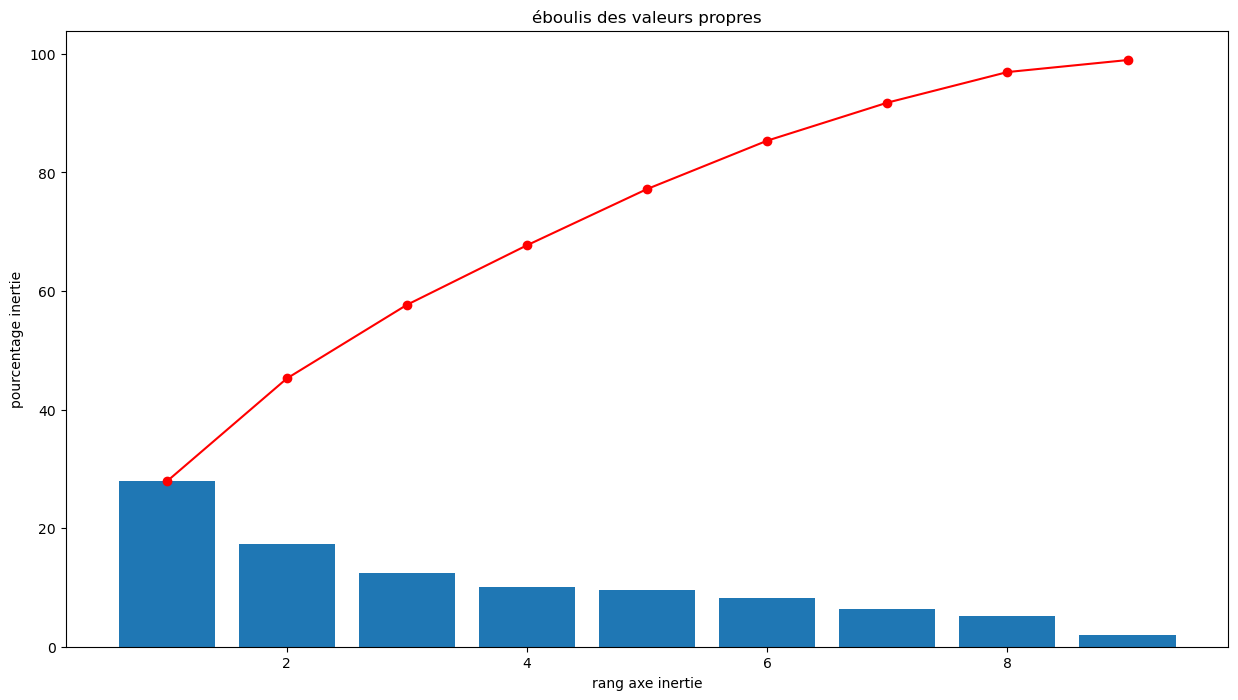

(1115, 9)

In [121]:
# choix nombre composantes avec 9 colonnes (si j'enleve colonne clusters)
n_comp = 9

#Instancier l'objet PCA pour réduire à 9 dimensions
pca = PCA(n_components=n_comp)

# Entraîner la PCA sur les données scalées
X_projected = pca.fit_transform(X_scaled)
print("nombre de composantes calculées: ", pca.n_components_)

#éboulis des valeurs propres
plt.figure( figsize = ( 15, 8))
display_scree_plot(pca)
      
# Vérifier la taille des données projetées (doit avoir deux colonnes)
X_projected.shape

In [122]:
# pour etre représentatif on voit qu'il faut aller jusqu'a la 6eme ou 7eme colonne 
#la 7eme colonne correspond au promo 2 on garde donc cette colonne et on est vers 85% d'informations gardés
#malheuresement je ne peux pas faire de graphique qui projette 7 dimensions, on va se contenter des 40% d'informations des 2 premieres dimensions

In [123]:
#appliquer acp pour avoir 2 composantes
pca_2 = PCA(n_components=2).fit(X_scaled)
XK_projected2 = pca.transform(X_scaled)

<Axes: >

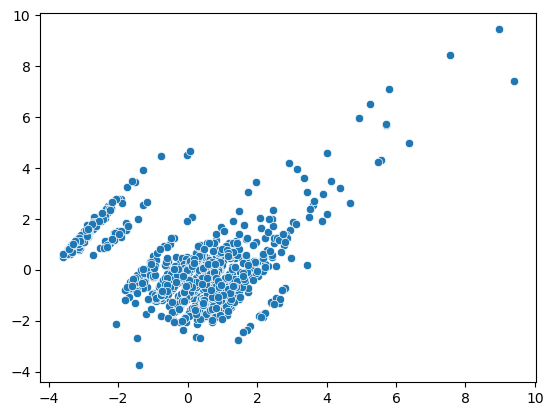

In [124]:
#dessiner projections X_scaled sur les 2 composantes
sns.scatterplot(x=XK_projected2[:, 0], y=XK_projected2[:, 1], alpha=1)

In [125]:
#fonction pour cercle des correlations

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:
 
            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))
 
            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])
 
            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:],
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
             
            # affichage des noms des variables 
            if labels is not None: 
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
             
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)
 
            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
         
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')
 
            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
 
            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

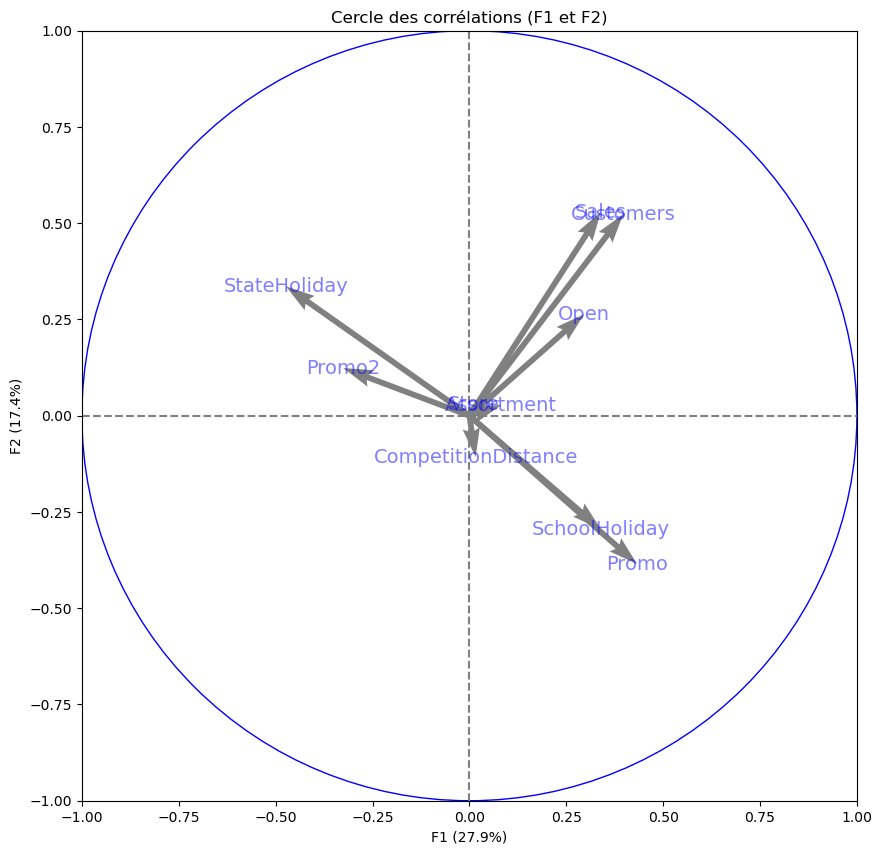

In [126]:
#utiliser la fonction cercle des corrélations sur notre jeu de données
index = df_aggregated4.index
features = df_aggregated4.columns
choix_n_comp=2
pcs= pca.components_
display_circles(pcs, choix_n_comp, pca_2, [(0,1)], labels = np.array(features))

In [127]:
#F1 et F2 semblent tous les 2 corrélés positivement aux CA et nombre de clients
#les promos 2 semblent corrélées négativement à F1 même si elles sont mal représentées
# les promos 1 semblent corrélées négativement à F2
#stateholiday semble corrélé négativement à F1 et positivement à F2

#interpretation un peu difficle

<Axes: >

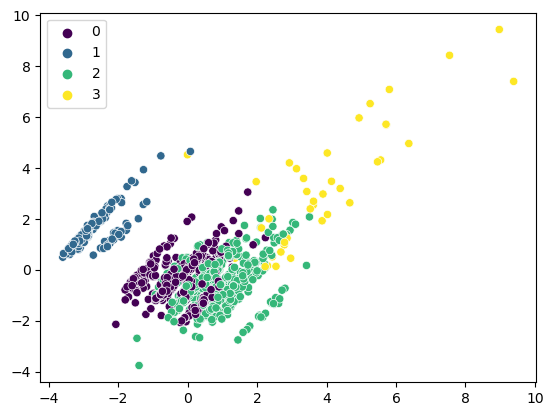

In [128]:
#dessin des projections sur les 2 axes principaux avec les clusters

#dessiner projections X_scaled sur les 2 composantes
sns.scatterplot(x=XK_projected2[:, 0], y=XK_projected2[:, 1],palette = 'viridis', alpha=1, hue=clusters)

In [129]:
# les clusters du groupe 0 et 2 sont proches, ce qui les distingue est le nombre de clients et le fait que le magasins pratique des promos de type 2 ou non (tableau de typologie des clusters plus haut nous montre ces points)

# 5. Construisez un modèle de prévision des ventes

## 5.1 moyenne mobile sur 15 jours pour l'ensemble des magasins

In [132]:
# on va faire des previsions sur le dataframe orignal qui represente une série temporelle
df_prev = df_merge2

#on va filtre pour les jours où les magasins sont ouverts

df_prev = df_prev[df_prev['Open'] == 1]

#repasser mes dates qui sont en index dans une colonne
df_prev = df_prev.reset_index()
df_prev = df_prev.sort_values(['Store', 'Date'], ascending=[True, True])
df_prev = df_prev.reset_index(drop=True)

# Calculer la moyenne mobile sur une période donnée (15 jours)
window_size = 15
df_prev['moyenne_mobile'] = df_prev.groupby('Store')['Sales'].rolling(window=window_size).mean().reset_index(level=0, drop=True)
print(df_prev[['Store', 'Date', 'Sales', 'moyenne_mobile']])

        Store       Date  Sales  moyenne_mobile
0           1 2013-01-02   5530             NaN
1           1 2013-01-03   4327             NaN
2           1 2013-01-04   4486             NaN
3           1 2013-01-05   4997             NaN
4           1 2013-01-07   7176             NaN
...       ...        ...    ...             ...
844387   1115 2015-07-27  10712         7000.60
844388   1115 2015-07-28   8093         7150.53
844389   1115 2015-07-29   7661         7183.67
844390   1115 2015-07-30   8405         7037.47
844391   1115 2015-07-31   8680         7112.00

[844392 rows x 4 columns]


In [133]:
#vérif que le calcul moyenne mobile reparte bien à 0 à chaque magasins:

print(df_prev[df_prev['Store'] == 2][['Store', 'Date', 'Sales', 'moyenne_mobile']].head(20))


     Store       Date  Sales  moyenne_mobile
781      2 2013-01-02   4422             NaN
782      2 2013-01-03   4159             NaN
783      2 2013-01-04   4484             NaN
784      2 2013-01-05   2342             NaN
785      2 2013-01-07   6775             NaN
786      2 2013-01-08   6318             NaN
787      2 2013-01-09   6763             NaN
788      2 2013-01-10   5618             NaN
789      2 2013-01-11   4810             NaN
790      2 2013-01-12   2630             NaN
791      2 2013-01-14   3995             NaN
792      2 2013-01-15   4075             NaN
793      2 2013-01-16   4198             NaN
794      2 2013-01-17   2973             NaN
795      2 2013-01-18   3441         4466.87
796      2 2013-01-19   2399         4332.00
797      2 2013-01-21   6311         4475.47
798      2 2013-01-22   5803         4563.40
799      2 2013-01-23   5974         4805.53
800      2 2013-01-24   5091         4693.27


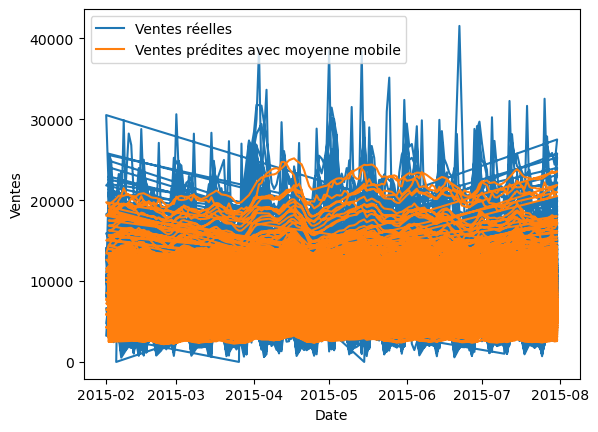

In [134]:
#comparaison entre prévisions moyenne mobiles et données réelles sur les 6 derniers mois (février à juillet 2015)

#selection période 6 derniers mois

df_reel2_6mois = df_prev[(df_prev['Date'] >= '2015-02-01') & (df_prev['Date'] <= '2015-07-31')]

# Visualiser les données de ventes et les prédictions

plt.plot(df_reel2_6mois['Date'], df_reel2_6mois['Sales'], label='Ventes réelles')
plt.plot(df_reel2_6mois['Date'], df_reel2_6mois['moyenne_mobile'], label='Ventes prédites avec moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.show()

In [135]:
#évaluer la qualité des prédictions

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculer les erreurs pour la période des 6 derniers mois
mse = mean_squared_error(df_reel2_6mois['Sales'].dropna(), df_reel2_6mois['moyenne_mobile'].dropna())
mae = mean_absolute_error(df_reel2_6mois['Sales'].dropna(), df_reel2_6mois['moyenne_mobile'].dropna())

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 2951931.0547999796
Mean Absolute Error: 1265.8253978123066


In [136]:
# les résultats sont elevés donc gros ecarts entre quantités réelles et prédites
# c'est peut etre dû au fait que je prends en compte l'ensemble des magasins séparemment et que les caractéristiques soient differentes
# je vais faire une moyenne des ventes par date pour l'ensemble des magasins et évaluer de nouveau la qualité des prédictions

In [137]:
#création dataframe agrégé par date des 6 derniers mois

df_agregé_par_date = df_reel2_6mois
df_agregé_par_date2 = df_agregé_par_date.groupby('Date').mean(numeric_only=True)

df_agregé_par_date2 = df_agregé_par_date2[['Sales', 'moyenne_mobile']].reset_index(level=0)

df_agregé_par_date2

Date    Sales  moyenne_mobile
0   2015-02-01 12530.89         9991.51
1   2015-02-02  9238.04         6701.34
2   2015-02-03  7993.43         6730.72
3   2015-02-04  7310.04         6822.84
4   2015-02-05  7157.91         6923.33
..         ...      ...             ...
176 2015-07-27  9620.21         6884.90
177 2015-07-28  8189.64         7001.89
178 2015-07-29  7636.98         7129.35
179 2015-07-30  7905.53         7009.85
180 2015-07-31  9083.33         7057.05

[181 rows x 3 columns]

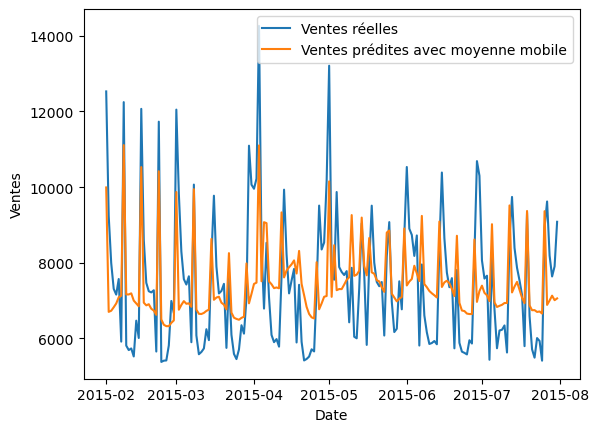

In [138]:
#représentation graphique:

plt.plot(df_agregé_par_date2['Date'], df_agregé_par_date2['Sales'], label='Ventes réelles')
plt.plot(df_agregé_par_date2['Date'], df_agregé_par_date2['moyenne_mobile'], label='Ventes prédites avec moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.show()

In [139]:
#évaluer la qualité des prédictions

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculer les erreurs pour la période des 6 derniers mois
mse = mean_squared_error(df_agregé_par_date2['Sales'].dropna(), df_agregé_par_date2['moyenne_mobile'].dropna())
mae = mean_absolute_error(df_agregé_par_date2['Sales'].dropna(), df_agregé_par_date2['moyenne_mobile'].dropna())

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1827306.6433980959
Mean Absolute Error: 1084.3926956728053


In [140]:
# les indices métriques sont un peu moins élevés mais toujours trés conséquents

## 5.2 tester les prédictions de moyennes mobiles par clusters

In [142]:
# rajouter des catégories de clusters dans le dataframe des ventes et agrégé par date et clusters filtré sur 6 derniers mois

df_aggregated5 = df_aggregated4.loc[:, ['Store','clusters']]

#Fusion des fichiers  df_prev et df_aggregated5
df_merge_mb = pd.merge(df_prev, df_aggregated5, how='left', on='Store')
df_merge_mb

#suppression colonne promointerval de type object qui va bloquer le regroupement des donnés par date et clusters

df_merge_mb2 = df_merge_mb.drop('PromoInterval', axis=1)

#regourper par date/clusters

df_regroupe = df_merge_mb2.groupby(['Date', 'clusters']).mean().reset_index()

#dataframe filtré sur les 6 derniers mois

df_regroupe_6_der_mois = df_regroupe[(df_regroupe['Date'] >= '2015-02-01') & (df_regroupe['Date'] <= '2015-07-31')]
df_regroupe_6_der_mois

Date  clusters  Store  DayOfWeek  Month    year    Sales  \
2693 2015-02-01         2 979.00       7.00   2.00 2015.00  3996.50   
2694 2015-02-01         3 529.00       7.00   2.00 2015.00 13597.69   
2695 2015-02-02         0 566.44       1.00   2.00 2015.00  8931.75   
2696 2015-02-02         1 544.97       1.00   2.00 2015.00  7889.51   
2697 2015-02-02         2 554.96       1.00   2.00 2015.00  9566.03   
...         ...       ...    ...        ...    ...     ...      ...   
3373 2015-07-30         3 564.30       4.00   7.00 2015.00 13092.95   
3374 2015-07-31         0 566.00       5.00   7.00 2015.00  8855.54   
3375 2015-07-31         1 544.97       5.00   7.00 2015.00  8651.11   
3376 2015-07-31         2 555.50       5.00   7.00 2015.00  8952.67   
3377 2015-07-31         3 564.30       5.00   7.00 2015.00 14923.45   

      Customers  Open  Promo  StateHoliday  SchoolHoliday  StoreType  \
2693     580.00  1.00   0.00          0.00           0.00       1.50   
2694    2265.94  1.00   0.00          0.00           0.00       2.00   
2695     828.67  1.00   1.00          0.00           0.12       2.33   
2696     683.03  1.00   1.00          0.00           0.00       2.51   
2697     964.29  1.00   1.00          0.00           0.30       2.07   
...         ...   ...    ...           ...            ...        ...   
3373    1816.33  1.00   1.00          0.00           0.97       1.65   
3374     800.31  1.00   1.00          0.00           1.00       2.33   
3375     739.03  1.00   1.00          0.00           0.00       2.51   
3376     882.77  1.00   1.00          0.00           1.00       2.07   
3377    2015.50  1.00   1.00          0.00           0.97       1.65   

      Assortment  concurrent  CompetitionDistance  Promo2  \
2693        2.00        1.00                14.79    0.00   
2694        1.69        1.00                 1.10    0.31   
2695        2.02        1.00                 4.61    1.00   
2696        1.72        1.00                 4.63    0.87   
2697        1.90        1.00                 6.02    0.00   
...          ...         ...                  ...     ...   
3373        2.27        1.00                 9.18    0.23   
3374        2.02        1.00                 4.56    1.00   
3375        1.72        1.00                 4.63    0.87   
3376        1.90        1.00                 6.03    0.00   
3377        2.27        1.00                 9.18    0.23   

                        year_month  moyenne_mobile  
2693 2015-02-01 00:00:00.000000000         5042.43  
2694 2015-02-01 00:00:00.000000000        10610.14  
2695 2015-02-01 00:00:00.000000000         6321.95  
2696 2015-02-01 00:00:00.000000000         6455.17  
2697 2015-01-31 23:59:59.999999744         6750.61  
...                            ...             ...  
3373 2015-07-01 00:00:00.000000000        12141.25  
3374 2015-07-01 00:00:00.000000000         6617.74  
3375 2015-07-01 00:00:00.000000000         7049.63  
3376 2015-07-01 00:00:00.000000000         7000.54  
3377 2015-07-01 00:00:00.000000000        12238.52  

[685 rows x 19 columns]

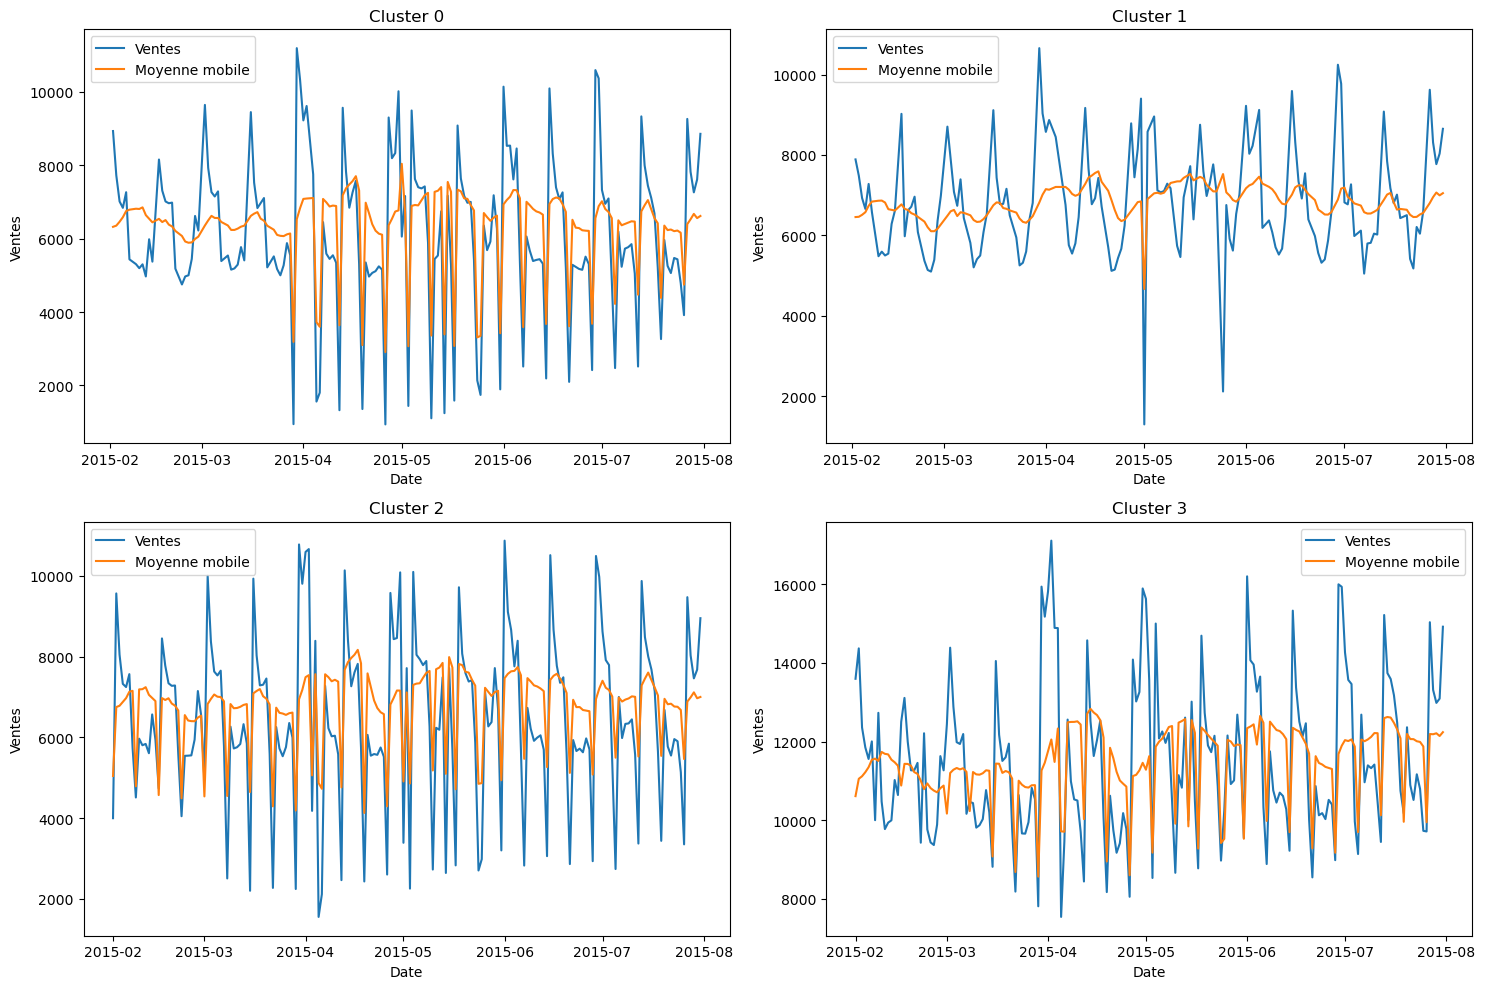

In [143]:
#graphique comparaison par clusters

# Séparez le dataframe en sous-dataframes pour chaque cluster
cluster_0 = df_regroupe_6_der_mois[df_regroupe_6_der_mois['clusters'] == 0]
cluster_1 = df_regroupe_6_der_mois[df_regroupe_6_der_mois['clusters'] == 1]
cluster_2 = df_regroupe_6_der_mois[df_regroupe_6_der_mois['clusters'] == 2]
cluster_3 = df_regroupe_6_der_mois[df_regroupe_6_der_mois['clusters'] == 3]

# Créez les graphiques pour chaque cluster
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(cluster_0['Date'], cluster_0['Sales'], label='Ventes')
plt.plot(cluster_0['Date'], cluster_0['moyenne_mobile'], label='Moyenne mobile')
plt.title('Cluster 0')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(cluster_1['Date'], cluster_1['Sales'], label='Ventes')
plt.plot(cluster_1['Date'], cluster_1['moyenne_mobile'], label='Moyenne mobile')
plt.title('Cluster 1')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(cluster_2['Date'], cluster_2['Sales'], label='Ventes')
plt.plot(cluster_2['Date'], cluster_2['moyenne_mobile'], label='Moyenne mobile')
plt.title('Cluster 2')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(cluster_3['Date'], cluster_3['Sales'], label='Ventes')
plt.plot(cluster_3['Date'], cluster_3['moyenne_mobile'], label='Moyenne mobile')
plt.title('Cluster 3')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()

plt.tight_layout()
plt.show()

In [144]:
# calcul moyenne ventes par clusters 6 derniers mois

moyenne_sales_clusters = df_regroupe_6_der_mois.groupby('clusters')['Sales'].mean()
moyenne_sales_clusters

clusters
0    6106.69
1    6802.38
2    6451.86
3   11544.72
Name: Sales, dtype: float64

In [145]:
# calcul moyenne moyenne mobile par clusters 6 derniers mois

moyenne_moymob_clusters = df_regroupe_6_der_mois.groupby('clusters')['moyenne_mobile'].mean()
moyenne_moymob_clusters

clusters
0    6299.73
1    6821.08
2    6750.23
3   11449.33
Name: moyenne_mobile, dtype: float64

In [146]:
#évaluer la qualité des prédictions par clusters:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculer les erreurs pour la période des 6 derniers mois cluster 0 
mse = mean_squared_error(cluster_0['Sales'].dropna(), cluster_0['moyenne_mobile'].dropna())
mae = mean_absolute_error(cluster_0['Sales'].dropna(), cluster_0['moyenne_mobile'].dropna())

print(f'Mean Squared Error cluster 0: {mse}')
print(f'Mean Absolute Error cluster 0: {mae}')

# Calculer les erreurs pour la période des 6 derniers mois cluster 1 
mse = mean_squared_error(cluster_1['Sales'].dropna(), cluster_1['moyenne_mobile'].dropna())
mae = mean_absolute_error(cluster_1['Sales'].dropna(), cluster_1['moyenne_mobile'].dropna())

print(f'Mean Squared Error cluster 1: {mse}')
print(f'Mean Absolute Error cluster 1: {mae}')

# Calculer les erreurs pour la période des 6 derniers mois cluster 2 
mse = mean_squared_error(cluster_2['Sales'].dropna(), cluster_2['moyenne_mobile'].dropna())
mae = mean_absolute_error(cluster_2['Sales'].dropna(), cluster_2['moyenne_mobile'].dropna())

print(f'Mean Squared Error cluster 2: {mse}')
print(f'Mean Absolute Error cluster 2: {mae}')

# Calculer les erreurs pour la période des 6 derniers mois cluster 3 
mse = mean_squared_error(cluster_3['Sales'].dropna(), cluster_3['moyenne_mobile'].dropna())
mae = mean_absolute_error(cluster_3['Sales'].dropna(), cluster_3['moyenne_mobile'].dropna())

print(f'Mean Squared Error cluster 3: {mse}')
print(f'Mean Absolute Error cluster 3: {mae}')

Mean Squared Error cluster 0: 2185458.654426835
Mean Absolute Error cluster 0: 1222.8579636530797
Mean Squared Error cluster 1: 1564247.6259604855
Mean Absolute Error cluster 1: 931.8454773711632
Mean Squared Error cluster 2: 2282522.244946062
Mean Absolute Error cluster 2: 1240.2531927374057
Mean Squared Error cluster 3: 2730153.9260288402
Mean Absolute Error cluster 3: 1292.163202663169


In [147]:
# les ecarts entres ventes reelles et predictions sont toujours importants en moyenne mobile

## 5.3 tester les prédictions de moyennes mobiles par centroide des clusters

In [149]:
# obtenir les centroides dans le k-means qu'on a calculé

# import méthode

from sklearn.metrics import pairwise_distances_argmin_min

# 1. le k_means a déterminé les coordonnées de tous les points de chaque clusters dans son calcul, on utilise donc la méthode cluster_centers pour trouver les coordonnées du centre des clusters:
centroides = kmeans_états.cluster_centers_

# 2 on utilise la méthode pairwise_distances_argmin_min pour trouver le magasins le plus proche du centre:
closest, _ = pairwise_distances_argmin_min(centroides, X_scaled)

# 3. Récupérer les magasins correspondant aux centroïdes
magasins_centroides = df_aggregated4.iloc[closest]

print("Magasins représentant les centroïdes pour chaque cluster :")
print(magasins_centroides[['Store', 'clusters']])

Magasins représentant les centroïdes pour chaque cluster :
     Store  clusters
558    559         0
470    471         1
402    403         2
675    676         3


In [150]:
#comparaison prédiction sur centroide cluster 0 = magasin 403

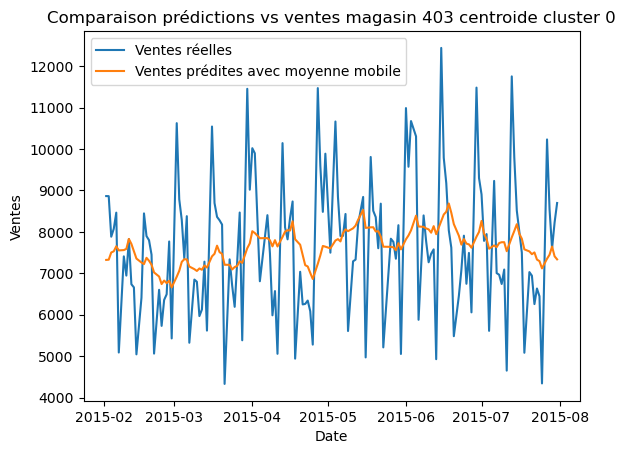

In [151]:
# je me base sur le dataframe df_reel2_6mois utilisé dans ma comparaison des previsions pour l'ensemble des magasins sur les 6 derniers mois

# je le filtre sur le magasin 403

df_boutique_403 = df_reel2_6mois.loc[df_reel2_6mois['Store'] == 403]

# Visualiser les données de ventes et les prédictions

plt.plot(df_boutique_403['Date'], df_boutique_403['Sales'], label='Ventes réelles')
plt.plot(df_boutique_403['Date'], df_boutique_403['moyenne_mobile'], label='Ventes prédites avec moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.title('Comparaison prédictions vs ventes magasin 403 centroide cluster 0')
plt.legend()
plt.show()

In [152]:
#évaluer la qualité des prédictions magasin 403

# Calculer les erreurs pour la période des 6 derniers mois
mse = mean_squared_error(df_boutique_403['Sales'].dropna(), df_boutique_403['moyenne_mobile'].dropna())
mae = mean_absolute_error(df_boutique_403['Sales'].dropna(), df_boutique_403['moyenne_mobile'].dropna())

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 2453818.682386279
Mean Absolute Error: 1199.9270693512303


In [153]:
#comparaison prédiction sur centroide cluster 1 = magasin 559

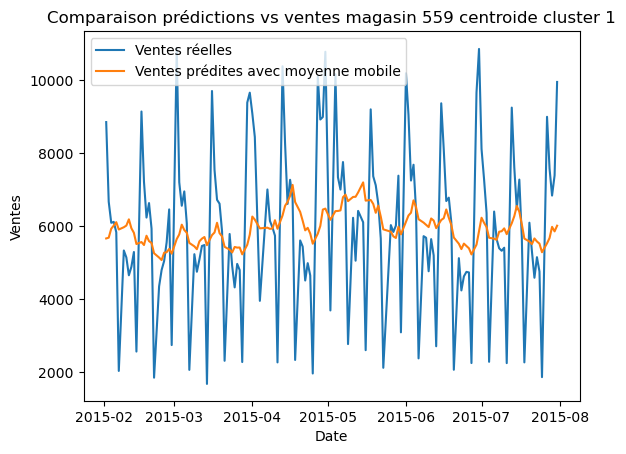

In [154]:
# filtre sur le magasin 559

df_boutique_559 = df_reel2_6mois.loc[df_reel2_6mois['Store'] == 559]

# Visualiser les données de ventes et les prédictions

plt.plot(df_boutique_559['Date'], df_boutique_559['Sales'], label='Ventes réelles')
plt.plot(df_boutique_559['Date'], df_boutique_559['moyenne_mobile'], label='Ventes prédites avec moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.title('Comparaison prédictions vs ventes magasin 559 centroide cluster 1')
plt.legend()
plt.show()

In [155]:
#évaluer la qualité des prédictions magasin 403

# Calculer les erreurs pour la période des 6 derniers mois
mse = mean_squared_error(df_boutique_559['Sales'].dropna(), df_boutique_559['moyenne_mobile'].dropna())
mae = mean_absolute_error(df_boutique_559['Sales'].dropna(), df_boutique_559['moyenne_mobile'].dropna())

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 4505059.122933334
Mean Absolute Error: 1589.8448888888888


In [156]:
#comparaison prédiction sur centroide cluster 2 = magasin 676

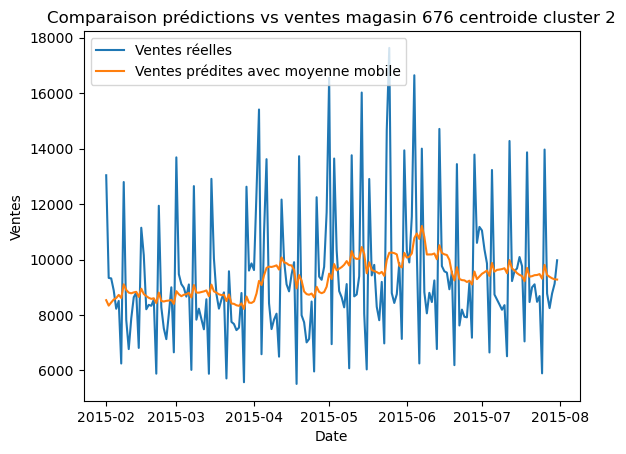

In [157]:
# filtre sur le magasin 676

df_boutique_676 = df_reel2_6mois.loc[df_reel2_6mois['Store'] == 676]

# Visualiser les données de ventes et les prédictions

plt.plot(df_boutique_676['Date'], df_boutique_676['Sales'], label='Ventes réelles')
plt.plot(df_boutique_676['Date'], df_boutique_676['moyenne_mobile'], label='Ventes prédites avec moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.title('Comparaison prédictions vs ventes magasin 676 centroide cluster 2')
plt.legend()
plt.show()

In [158]:
#évaluer la qualité des prédictions magasin 676

# Calculer les erreurs pour la période des 6 derniers mois
mse = mean_squared_error(df_boutique_676['Sales'].dropna(), df_boutique_676['moyenne_mobile'].dropna())
mae = mean_absolute_error(df_boutique_676['Sales'].dropna(), df_boutique_676['moyenne_mobile'].dropna())

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 5065987.014929405
Mean Absolute Error: 1693.8235727440147


In [159]:
#comparaison prédiction sur centroide cluster 3 = magasin 471

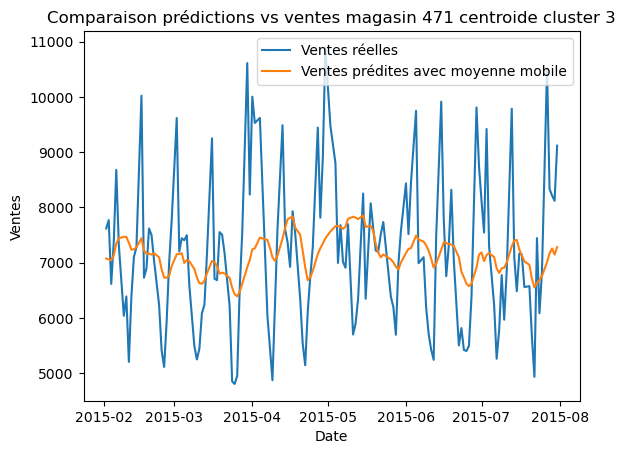

In [160]:
# filtre sur le magasin 471

df_boutique_471 = df_reel2_6mois.loc[df_reel2_6mois['Store'] == 471]

# Visualiser les données de ventes et les prédictions

plt.plot(df_boutique_471['Date'], df_boutique_471['Sales'], label='Ventes réelles')
plt.plot(df_boutique_471['Date'], df_boutique_471['moyenne_mobile'], label='Ventes prédites avec moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.title('Comparaison prédictions vs ventes magasin 471 centroide cluster 3')
plt.legend()
plt.show()

In [161]:
#évaluer la qualité des prédictions magasin 471

# Calculer les erreurs pour la période des 6 derniers mois
mse = mean_squared_error(df_boutique_471['Sales'].dropna(), df_boutique_471['moyenne_mobile'].dropna())
mae = mean_absolute_error(df_boutique_471['Sales'].dropna(), df_boutique_471['moyenne_mobile'].dropna())

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1610901.735152871
Mean Absolute Error: 982.3297539149889


### conclusions moyennes mobiles

In [163]:
# on voit qu'aux différents niveaux, ensembles des ventes, ventes par clusters et ventes par centroides des clusters les prédictions en moyennes mobiles sont trés éloignées des valeurs de ventes réelles
# malgrés tout que se sont les clusters 1 et 2 ainsi que leurs centroides qui ont des prédictions un peu meilleures même si ca reste à relativisé
# les predictions en moyenne mobile ont du mal à "capter" les grosses fluctuations des saisonnalités

## 5.4 prévisions sarima pour l'ensemble des magasins

In [165]:
# choix de la méthode sarima car le jeu de données est une série temporelles avec une tendance croissante et des saisonnalitées ainsi que des variables qui influent sur le CA
# on part du dataframe df_merge_mb2 

In [166]:
df_merge_mb2 

Date  Store  DayOfWeek  Month  year  Sales  Customers  Open  \
0      2013-01-02      1          3      1  2013   5530        668     1   
1      2013-01-03      1          4      1  2013   4327        578     1   
2      2013-01-04      1          5      1  2013   4486        619     1   
3      2013-01-05      1          6      1  2013   4997        635     1   
4      2013-01-07      1          1      1  2013   7176        785     1   
...           ...    ...        ...    ...   ...    ...        ...   ...   
844387 2015-07-27   1115          1      7  2015  10712        608     1   
844388 2015-07-28   1115          2      7  2015   8093        500     1   
844389 2015-07-29   1115          3      7  2015   7661        473     1   
844390 2015-07-30   1115          4      7  2015   8405        502     1   
844391 2015-07-31   1115          5      7  2015   8680        538     1   

        Promo  StateHoliday  SchoolHoliday  StoreType  Assortment  concurrent  \
0           0             0              1          3           1           1   
1           0             0              1          3           1           1   
2           0             0              1          3           1           1   
3           0             0              1          3           1           1   
4           1             0              1          3           1           1   
...       ...           ...            ...        ...         ...         ...   
844387      1             0              1          4           3           1   
844388      1             0              1          4           3           1   
844389      1             0              1          4           3           1   
844390      1             0              1          4           3           1   
844391      1             0              1          4           3           1   

        CompetitionDistance  Promo2 year_month  moyenne_mobile  clusters  
0                      1.27       0 2013-01-01             NaN         2  
1                      1.27       0 2013-01-01             NaN         2  
2                      1.27       0 2013-01-01             NaN         2  
3                      1.27       0 2013-01-01             NaN         2  
4                      1.27       0 2013-01-01             NaN         2  
...                     ...     ...        ...             ...       ...  
844387                 5.35       1 2015-07-01         7000.60         0  
844388                 5.35       1 2015-07-01         7150.53         0  
844389                 5.35       1 2015-07-01         7183.67         0  
844390                 5.35       1 2015-07-01         7037.47         0  
844391                 5.35       1 2015-07-01         7112.00         0  

[844392 rows x 19 columns]

C:\Users\grego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\grego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MSE pour les ventes non filtrées : 2005120.628952452
MAE pour les ventes non filtrées : 1186.1638924894412


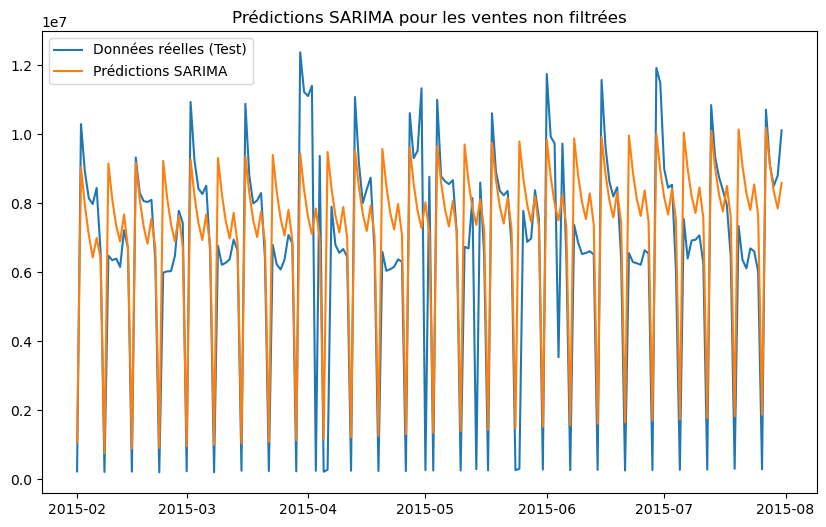

In [167]:
# contrôle format date df
df_merge_mb2['Date'] = pd.to_datetime(df_merge_mb2['Date'])

# Agréger le df par ventes pour plus avoir le détails par magasins
global_sales = df_merge_mb2.groupby('Date')['Sales'].sum()

# Diviser les données en train (période entrainement) et test (période prédictions, 6 derniers mois)
train_data = global_sales[:'2015-01-31']
test_data = global_sales['2015-02-01':]

# Paramètres du modèle SARIMA (à ajuster selon vos données)
p, d, q = 1, 1, 1
P, D, Q, m = 1, 1, 1, 7  # Saison hebdomadaire

# Ajuster le modèle SARIMA
sarima_model = sm.tsa.SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,m))
sarima_fit = sarima_model.fit(disp=False)

# Prédictions pour la période de test (6 mois)
forecast_sarima = sarima_fit.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# Calcul des métriques mse et mae
mse = np.sqrt(mean_squared_error(test_data, forecast_sarima))
print(f"MSE pour les ventes non filtrées : {mse}")
mae = np.sqrt(mean_absolute_error(test_data, forecast_sarima))
print(f"MAE pour les ventes non filtrées : {mae}")

# Visualisation des résultats
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data, label='Données réelles (Test)')
plt.plot(test_data.index, forecast_sarima, label='Prédictions SARIMA')
plt.legend()
plt.title('Prédictions SARIMA pour les ventes non filtrées')
plt.show()

In [168]:
# à ce niveau les predictions ont l'air de suivre la variance des saisonnalités

## 5.5 Prévisions Sarima par clusters

MSE pour les ventes non filtrées : 737615.964116831
MAE pour les ventes non filtrées : 715.6210923212575


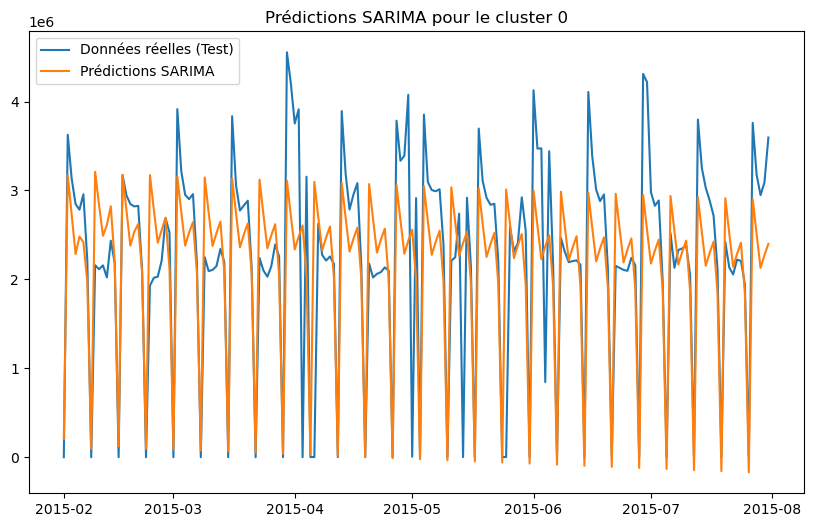

In [170]:
# On filtre le dataframe sur le cluster 0
cluster_0_data = df_merge_mb2[df_merge_mb2['clusters'] == 0] 

# Utilisation de .loc pour éviter le warning
cluster_0_data.loc[:, 'Date'] = pd.to_datetime(cluster_0_data['Date']) 

# Aggréger les ventes par date pour le cluster 0
cluster_0_sales = cluster_0_data.groupby('Date')['Sales'].sum() 

# Ajout de la fréquence explicite pour les dates 
cluster_0_sales = cluster_0_sales.asfreq('D') # Fréquence journalière (ou 'W' pour hebdomadaire selon vos données)

# Diviser les données en train (période d'entraînement) et test (période de prédiction, 6 derniers mois)
train_data_0 = cluster_0_sales[:'2015-01-31']
test_data_0 = cluster_0_sales['2015-02-01':] 
test_data_0 = test_data_0.fillna(0)

# Paramètres du modèle SARIMA (à ajuster selon vos données)
p, d, q = 1, 1, 1 
P, D, Q, m = 1, 1, 1, 7 

# Saison hebdomadaire# Ajuster le modèle SARIMA pour le cluster 0
sarima_model_0 = sm.tsa.SARIMAX(train_data_0, order=(p, d, q), seasonal_order=(P, D, Q, m)) 
sarima_fit_0 = sarima_model_0.fit(disp=False) 

# Prédictions pour le cluster 0 pendant la période de test (6 mois) 
forecast_sarima_0 = sarima_fit_0.predict(start=test_data_0.index[0], end=test_data_0.index[-1], dynamic=False) 

# Calcul des métriques MSE et MAE pour le cluster 0

mse_0 = np.sqrt(mean_squared_error(test_data_0, forecast_sarima_0))
print(f"MSE pour les ventes non filtrées : {mse_0}") 
mae_0 = np.sqrt(mean_absolute_error(test_data_0, forecast_sarima_0)) 
print(f"MAE pour les ventes non filtrées : {mae_0}") 

# Visualisation des prédictions pour le cluster 0
plt.figure(figsize=(10, 6)) 
plt.plot(test_data_0.index, test_data_0, label='Données réelles (Test)')
plt.plot(test_data_0.index, forecast_sarima_0, label='Prédictions SARIMA')
plt.legend() 
plt.title('Prédictions SARIMA pour le cluster 0')
plt.show()

MSE pour les ventes non filtrées : 527538.3785543721
MAE pour les ventes non filtrées : 589.3916387673174


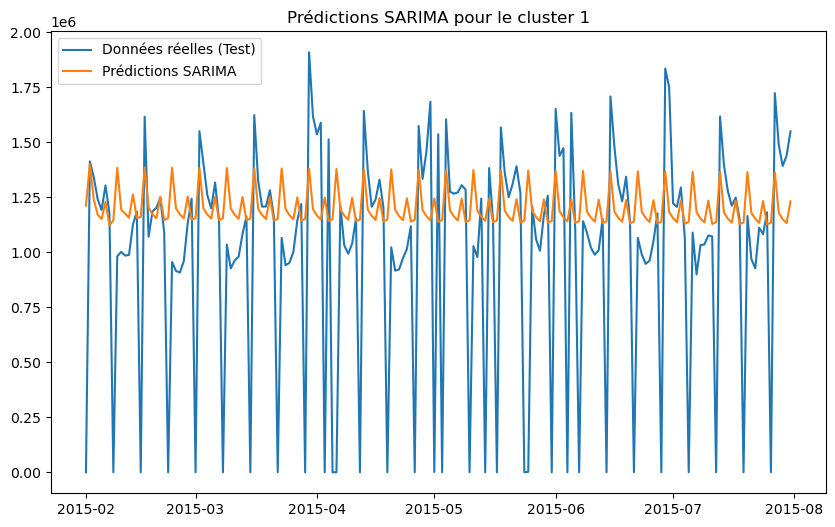

In [171]:
# On filtre le dataframe sur le cluster 1
cluster_1_data = df_merge_mb2[df_merge_mb2['clusters'] == 1] 

# Utilisation de .loc pour éviter le warning
cluster_1_data.loc[:, 'Date'] = pd.to_datetime(cluster_1_data['Date']) 

# Aggréger les ventes par date pour le cluster 1
cluster_1_sales = cluster_1_data.groupby('Date')['Sales'].sum() 

# Ajout de la fréquence explicite pour les dates 
cluster_1_sales = cluster_1_sales.asfreq('D') # Fréquence journalière (ou 'W' pour hebdomadaire selon vos données)

# Diviser les données en train (période d'entraînement) et test (période de prédiction, 6 derniers mois)
train_data_1 = cluster_1_sales[:'2015-01-31']
test_data_1 = cluster_1_sales['2015-02-01':] 
test_data_1 = test_data_1.fillna(0)

# Paramètres du modèle SARIMA (à ajuster selon vos données)
p, d, q = 1, 1, 1 
P, D, Q, m = 1, 1, 1, 7 

# Saison hebdomadaire# Ajuster le modèle SARIMA pour le cluster 1
sarima_model_1 = sm.tsa.SARIMAX(train_data_1, order=(p, d, q), seasonal_order=(P, D, Q, m)) 
sarima_fit_1 = sarima_model_1.fit(disp=False) 

# Prédictions pour le cluster 1 pendant la période de test (6 mois) 
forecast_sarima_1 = sarima_fit_1.predict(start=test_data_1.index[0], end=test_data_1.index[-1], dynamic=False) 

# Calcul des métriques MSE et MAE pour le cluster 1

mse_1 = np.sqrt(mean_squared_error(test_data_1, forecast_sarima_1))
print(f"MSE pour les ventes non filtrées : {mse_1}") 
mae_1 = np.sqrt(mean_absolute_error(test_data_1, forecast_sarima_1)) 
print(f"MAE pour les ventes non filtrées : {mae_1}") 

# Visualisation des prédictions pour le cluster 1
plt.figure(figsize=(10, 6)) 
plt.plot(test_data_1.index, test_data_1, label='Données réelles (Test)')
plt.plot(test_data_1.index, forecast_sarima_1, label='Prédictions SARIMA')
plt.legend() 
plt.title('Prédictions SARIMA pour le cluster 1')
plt.show()

MSE pour les ventes non filtrées : 857506.308688969
MAE pour les ventes non filtrées : 747.924676311018


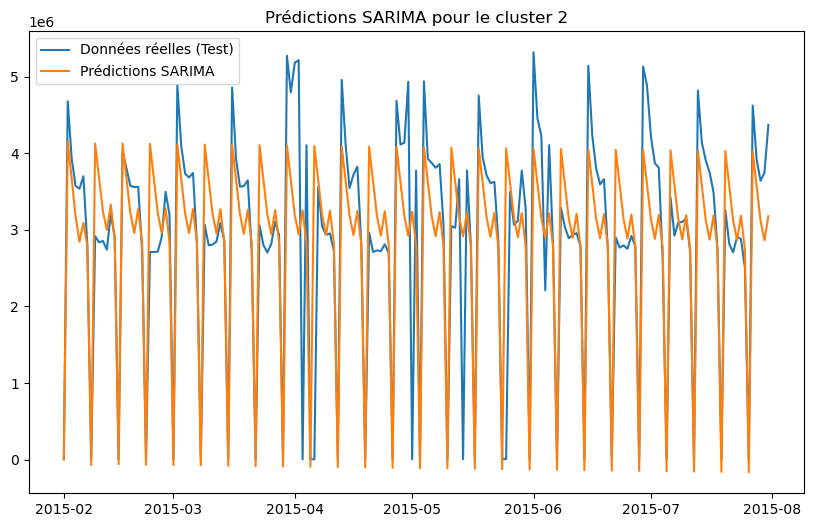

In [172]:
# On filtre le dataframe sur le cluster 2
cluster_2_data = df_merge_mb2[df_merge_mb2['clusters'] == 2] 

# Utilisation de .loc pour éviter le warning
cluster_2_data.loc[:, 'Date'] = pd.to_datetime(cluster_2_data['Date']) 

# Aggréger les ventes par date pour le cluster 2
cluster_2_sales = cluster_2_data.groupby('Date')['Sales'].sum() 

# Ajout de la fréquence explicite pour les dates 
cluster_2_sales = cluster_2_sales.asfreq('D') # Fréquence journalière (ou 'W' pour hebdomadaire selon vos données)

# Diviser les données en train (période d'entraînement) et test (période de prédiction, 6 derniers mois)
train_data_2 = cluster_2_sales[:'2015-01-31']
test_data_2 = cluster_2_sales['2015-02-01':] 
test_data_2 = test_data_2.fillna(0)

# Paramètres du modèle SARIMA (à ajuster selon vos données)
p, d, q = 1, 1, 1 
P, D, Q, m = 1, 1, 1, 7 

# Saison hebdomadaire# Ajuster le modèle SARIMA pour le cluster 2
sarima_model_2 = sm.tsa.SARIMAX(train_data_2, order=(p, d, q), seasonal_order=(P, D, Q, m)) 
sarima_fit_2 = sarima_model_2.fit(disp=False) 

# Prédictions pour le cluster 2 pendant la période de test (6 mois) 
forecast_sarima_2 = sarima_fit_2.predict(start=test_data_2.index[0], end=test_data_2.index[-1], dynamic=False) 

# Calcul des métriques MSE et MAE pour le cluster 2

mse_2 = np.sqrt(mean_squared_error(test_data_2, forecast_sarima_2))
print(f"MSE pour les ventes non filtrées : {mse_2}") 
mae_2 = np.sqrt(mean_absolute_error(test_data_2, forecast_sarima_2)) 
print(f"MAE pour les ventes non filtrées : {mae_2}") 

# Visualisation des prédictions pour le cluster 2
plt.figure(figsize=(10, 6)) 
plt.plot(test_data_2.index, test_data_2, label='Données réelles (Test)')
plt.plot(test_data_2.index, forecast_sarima_2, label='Prédictions SARIMA')
plt.legend() 
plt.title('Prédictions SARIMA pour le cluster 2')
plt.show()

MSE pour les ventes non filtrées : 76200.77194491898
MAE pour les ventes non filtrées : 236.77291969891178


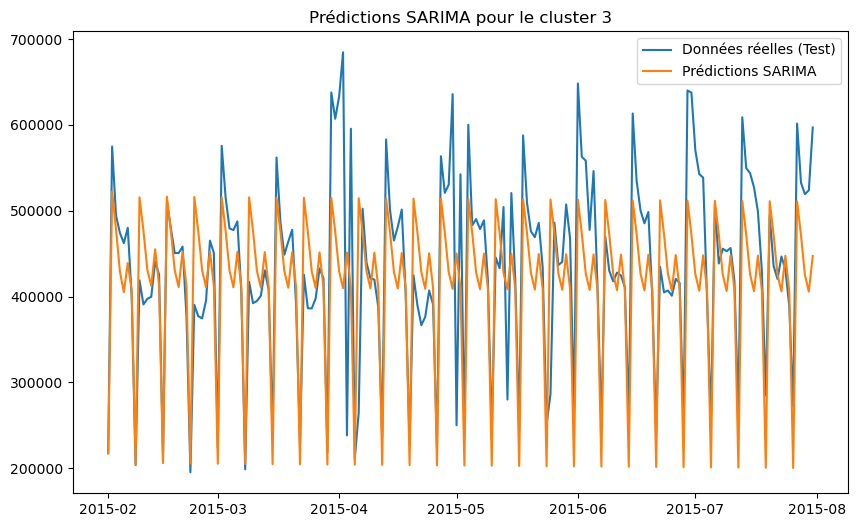

In [173]:
# On filtre le dataframe sur le cluster 3
cluster_3_data = df_merge_mb2[df_merge_mb2['clusters'] == 3] 

# Utilisation de .loc pour éviter le warning
cluster_3_data.loc[:, 'Date'] = pd.to_datetime(cluster_3_data['Date']) 

# Aggréger les ventes par date pour le cluster 3
cluster_3_sales = cluster_3_data.groupby('Date')['Sales'].sum() 

# Ajout de la fréquence explicite pour les dates 
cluster_3_sales = cluster_3_sales.asfreq('D') # Fréquence journalière (ou 'W' pour hebdomadaire selon vos données)

# Diviser les données en train (période d'entraînement) et test (période de prédiction, 6 derniers mois)
train_data_3 = cluster_3_sales[:'2015-01-31']
test_data_3 = cluster_3_sales['2015-02-01':] 
test_data_3 = test_data_3.fillna(0)

# Paramètres du modèle SARIMA (à ajuster selon vos données)
p, d, q = 1, 1, 1 
P, D, Q, m = 1, 1, 1, 7 

# Saison hebdomadaire# Ajuster le modèle SARIMA pour le cluster 3
sarima_model_3 = sm.tsa.SARIMAX(train_data_3, order=(p, d, q), seasonal_order=(P, D, Q, m)) 
sarima_fit_3 = sarima_model_3.fit(disp=False) 

# Prédictions pour le cluster 2 pendant la période de test (6 mois) 
forecast_sarima_3 = sarima_fit_3.predict(start=test_data_3.index[0], end=test_data_3.index[-1], dynamic=False) 

# Calcul des métriques MSE et MAE pour le cluster 3

mse_3 = np.sqrt(mean_squared_error(test_data_3, forecast_sarima_3))
print(f"MSE pour les ventes non filtrées : {mse_3}") 
mae_3 = np.sqrt(mean_absolute_error(test_data_3, forecast_sarima_3)) 
print(f"MAE pour les ventes non filtrées : {mae_3}") 

# Visualisation des prédictions pour le cluster 3
plt.figure(figsize=(10, 6)) 
plt.plot(test_data_3.index, test_data_3, label='Données réelles (Test)')
plt.plot(test_data_3.index, forecast_sarima_3, label='Prédictions SARIMA')
plt.legend() 
plt.title('Prédictions SARIMA pour le cluster 3')
plt.show()

In [174]:
# les predictions de ventes sarima suivent mieux les saisonnalités et ont des indices métriques bien meilleurs qu'avec une moyenne mobile

## 5.6 Prévisions Sarima par centroides des clusters

MSE pour les ventes non filtrées : 3254.591133852769
MAE pour les ventes non filtrées : 45.344770234969


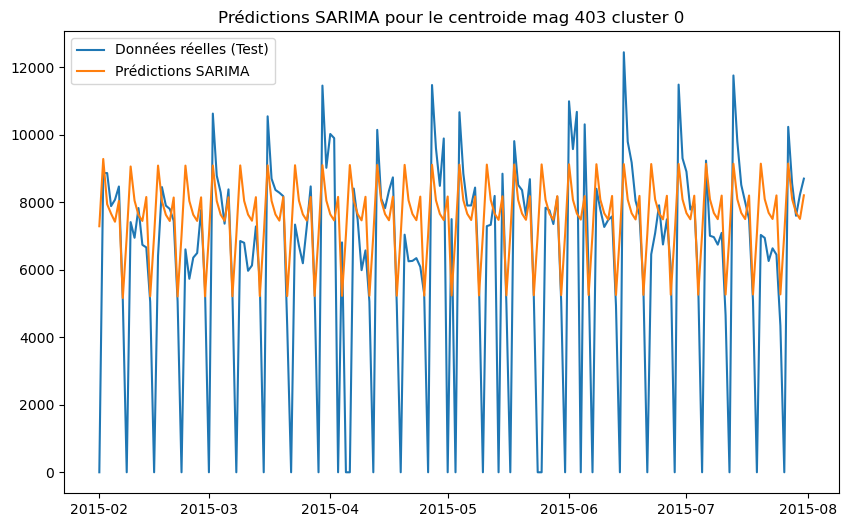

In [176]:
# On filtre le dataframe sur le centroide du cluster 0, mag 403
mag_403_data = df_merge_mb2[df_merge_mb2['Store'] == 403] 

# Utilisation de .loc pour éviter le warning
mag_403_data.loc[:, 'Date'] = pd.to_datetime(mag_403_data['Date']) 

# Aggréger les ventes par date pour le mag 403
mag_403_sales = mag_403_data.groupby('Date')['Sales'].sum() 

# Ajout de la fréquence explicite pour les dates 
mag_403_sales = mag_403_sales.asfreq('D') # Fréquence journalière (ou 'W' pour hebdomadaire selon vos données)

# Diviser les données en train (période d'entraînement) et test (période de prédiction, 6 derniers mois)
train_data_403 = mag_403_sales[:'2015-01-31']
test_data_403 = mag_403_sales['2015-02-01':] 
test_data_403 = test_data_403.fillna(0) 

# Paramètres du modèle SARIMA (à ajuster selon vos données)
p, d, q = 1, 1, 1 
P, D, Q, m = 1, 1, 1, 7 

# Saison hebdomadaire# Ajuster le modèle SARIMA pour le mag 403
sarima_model_403= sm.tsa.SARIMAX(train_data_403, order=(p, d, q), seasonal_order=(P, D, Q, m)) 
sarima_fit_403 = sarima_model_403.fit(disp=False) 

# Prédictions pour le mag 403 pendant la période de test (6 mois) 
forecast_sarima_403 = sarima_fit_403.predict(start=test_data_403.index[0], end=test_data_403.index[-1], dynamic=False) 

# Calcul des métriques MSE et MAE pour le mag 403

mse_403 = np.sqrt(mean_squared_error(test_data_403, forecast_sarima_403))
print(f"MSE pour les ventes non filtrées : {mse_403}") 
mae_403 = np.sqrt(mean_absolute_error(test_data_403, forecast_sarima_403)) 
print(f"MAE pour les ventes non filtrées : {mae_403}") 

# Visualisation des prédictions pour le mag 403
plt.figure(figsize=(10, 6)) 
plt.plot(test_data_403.index, test_data_403, label='Données réelles (Test)')
plt.plot(test_data_403.index, forecast_sarima_403, label='Prédictions SARIMA')
plt.legend() 
plt.title('Prédictions SARIMA pour le centroide mag 403 cluster 0')
plt.show()

MSE pour les ventes non filtrées : 2662.4397771255485
MAE pour les ventes non filtrées : 43.26641464159381


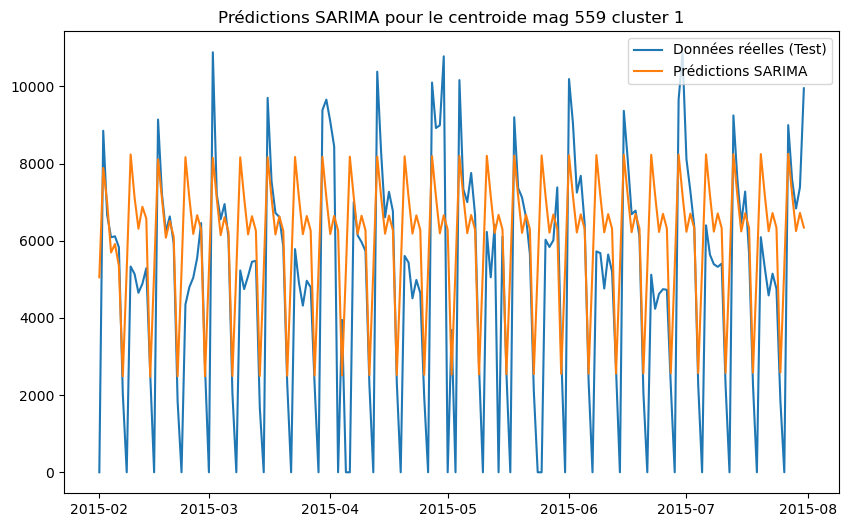

In [177]:
# centroide mag 559 cluster 1 

# On filtre le dataframe sur le centroide du cluster 1, mag 559
mag_559_data = df_merge_mb2[df_merge_mb2['Store'] == 559] 

# Utilisation de .loc pour éviter le warning
mag_559_data.loc[:, 'Date'] = pd.to_datetime(mag_559_data['Date']) 

# Aggréger les ventes par date pour le mag 559
mag_559_sales = mag_559_data.groupby('Date')['Sales'].sum() 

# Ajout de la fréquence explicite pour les dates 
mag_559_sales = mag_559_sales.asfreq('D') # Fréquence journalière (ou 'W' pour hebdomadaire selon vos données)

# Diviser les données en train (période d'entraînement) et test (période de prédiction, 6 derniers mois)
train_data_559 = mag_559_sales[:'2015-01-31']
test_data_559 = mag_559_sales['2015-02-01':] 
test_data_559 = test_data_559.fillna(0)

# Paramètres du modèle SARIMA (à ajuster selon vos données)
p, d, q = 1, 1, 1 
P, D, Q, m = 1, 1, 1, 7 

# Saison hebdomadaire# Ajuster le modèle SARIMA pour le mag 559
sarima_model_559= sm.tsa.SARIMAX(train_data_559, order=(p, d, q), seasonal_order=(P, D, Q, m)) 
sarima_fit_559 = sarima_model_559.fit(disp=False) 

# Prédictions pour le mag 559 pendant la période de test (6 mois) 
forecast_sarima_559 = sarima_fit_559.predict(start=test_data_559.index[0], end=test_data_559.index[-1], dynamic=False) 

# Calcul des métriques MSE et MAE pour le mag 559

mse_559 = np.sqrt(mean_squared_error(test_data_559, forecast_sarima_559))
print(f"MSE pour les ventes non filtrées : {mse_559}") 
mae_559 = np.sqrt(mean_absolute_error(test_data_559, forecast_sarima_559)) 
print(f"MAE pour les ventes non filtrées : {mae_559}") 

# Visualisation des prédictions pour le mag 559
plt.figure(figsize=(10, 6)) 
plt.plot(test_data_559.index, test_data_559, label='Données réelles (Test)')
plt.plot(test_data_559.index, forecast_sarima_559, label='Prédictions SARIMA')
plt.legend() 
plt.title('Prédictions SARIMA pour le centroide mag 559 cluster 1')
plt.show()

MSE pour les ventes non filtrées : 1543.7386830458295
MAE pour les ventes non filtrées : 30.531341587197893


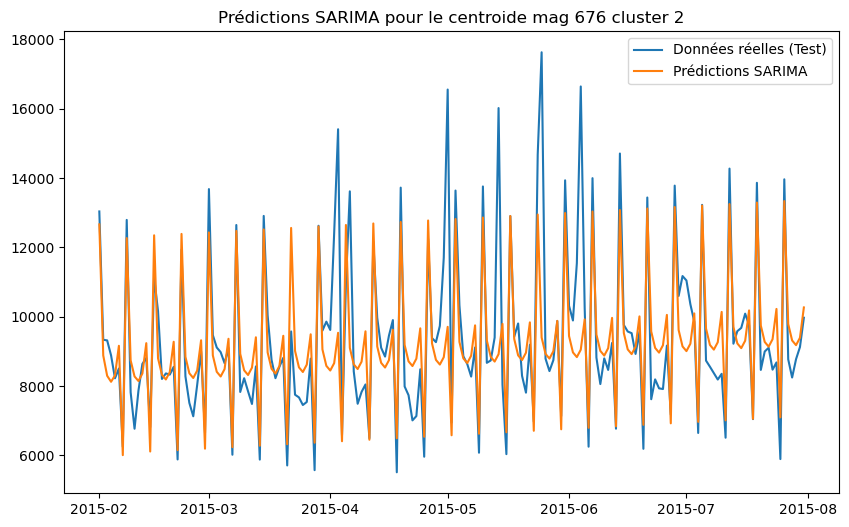

In [178]:
# centroide mag 676 cluster 2

# On filtre le dataframe sur le centroide du cluster 2, mag 676
mag_676_data = df_merge_mb2[df_merge_mb2['Store'] == 676] 

# Utilisation de .loc pour éviter le warning
mag_676_data.loc[:, 'Date'] = pd.to_datetime(mag_676_data['Date']) 

# Aggréger les ventes par date pour le mag 676
mag_676_sales = mag_676_data.groupby('Date')['Sales'].sum() 

# Ajout de la fréquence explicite pour les dates 
mag_676_sales = mag_676_sales.asfreq('D') # Fréquence journalière (ou 'W' pour hebdomadaire selon vos données)

# Diviser les données en train (période d'entraînement) et test (période de prédiction, 6 derniers mois)
train_data_676 = mag_676_sales[:'2015-01-31']
test_data_676 = mag_676_sales['2015-02-01':] 
test_data_676 = test_data_676.fillna(0)

# Paramètres du modèle SARIMA (à ajuster selon vos données)
p, d, q = 1, 1, 1 
P, D, Q, m = 1, 1, 1, 7 

# Saison hebdomadaire# Ajuster le modèle SARIMA pour le mag 676
sarima_model_676= sm.tsa.SARIMAX(train_data_676, order=(p, d, q), seasonal_order=(P, D, Q, m)) 
sarima_fit_676 = sarima_model_676.fit(disp=False) 

# Prédictions pour le mag 559 pendant la période de test (6 mois) 
forecast_sarima_676 = sarima_fit_676.predict(start=test_data_676.index[0], end=test_data_676.index[-1], dynamic=False) 

# Calcul des métriques MSE et MAE pour le mag 676

mse_676 = np.sqrt(mean_squared_error(test_data_676, forecast_sarima_676))
print(f"MSE pour les ventes non filtrées : {mse_676}") 
mae_676 = np.sqrt(mean_absolute_error(test_data_676, forecast_sarima_676)) 
print(f"MAE pour les ventes non filtrées : {mae_676}") 

# Visualisation des prédictions pour le mag 676
plt.figure(figsize=(10, 6)) 
plt.plot(test_data_676.index, test_data_676, label='Données réelles (Test)')
plt.plot(test_data_676.index, forecast_sarima_676, label='Prédictions SARIMA')
plt.legend() 
plt.title('Prédictions SARIMA pour le centroide mag 676 cluster 2')
plt.show()

C:\Users\grego\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE pour les ventes non filtrées : 3580.0142513221854
MAE pour les ventes non filtrées : 48.34480203658066


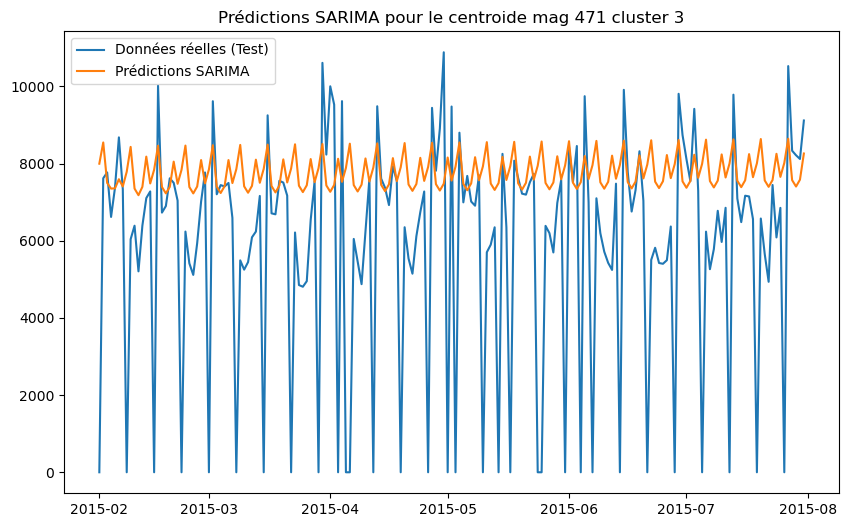

In [179]:
# centroide mag 471 cluster 3

# On filtre le dataframe sur le centroide du cluster 3, mag 471
mag_471_data = df_merge_mb2[df_merge_mb2['Store'] == 471] 

# Utilisation de .loc pour éviter le warning
mag_471_data.loc[:, 'Date'] = pd.to_datetime(mag_471_data['Date']) 

# Aggréger les ventes par date pour le mag 676
mag_471_sales = mag_471_data.groupby('Date')['Sales'].sum() 

# Ajout de la fréquence explicite pour les dates 
mag_471_sales = mag_471_sales.asfreq('D') # Fréquence journalière (ou 'W' pour hebdomadaire selon vos données)

# Diviser les données en train (période d'entraînement) et test (période de prédiction, 6 derniers mois)
train_data_471 = mag_471_sales[:'2015-01-31']
test_data_471 = mag_471_sales['2015-02-01':] 
test_data_471 = test_data_471.fillna(0)

# Paramètres du modèle SARIMA (à ajuster selon vos données)
p, d, q = 1, 1, 1 
P, D, Q, m = 1, 1, 1, 7 

# Saison hebdomadaire# Ajuster le modèle SARIMA pour le mag 471
sarima_model_471= sm.tsa.SARIMAX(train_data_471, order=(p, d, q), seasonal_order=(P, D, Q, m)) 
sarima_fit_471 = sarima_model_471.fit(disp=False) 

# Prédictions pour le mag 471 pendant la période de test (6 mois) 
forecast_sarima_471 = sarima_fit_471.predict(start=test_data_471.index[0], end=test_data_471.index[-1], dynamic=False) 

# Calcul des métriques MSE et MAE pour le mag 471

mse_471 = np.sqrt(mean_squared_error(test_data_471, forecast_sarima_471))
print(f"MSE pour les ventes non filtrées : {mse_471}") 
mae_471 = np.sqrt(mean_absolute_error(test_data_471, forecast_sarima_471)) 
print(f"MAE pour les ventes non filtrées : {mae_471}") 

# Visualisation des prédictions pour le mag 471
plt.figure(figsize=(10, 6)) 
plt.plot(test_data_471.index, test_data_471, label='Données réelles (Test)')
plt.plot(test_data_471.index, forecast_sarima_471, label='Prédictions SARIMA')
plt.legend() 
plt.title('Prédictions SARIMA pour le centroide mag 471 cluster 3')
plt.show()

## 5.7 Comparaisons métriques moyennes mobiles et sarima pour les centroides (analyse performances)

In [181]:
#mag  cluster0: 

#moyenne mobiles:
#Mean Squared Error: 2453818.682386279
#Mean Absolute Error: 1199.9270693512303

#sarima:
#MSE pour les ventes non filtrées : 3254.591133852769
#MAE pour les ventes non filtrées : 45.344770234969


# meilleure qualité prédiction avec methode sarima, indice mse 750 fois plus petit, indice mae 26 fois plus petit

In [182]:
#mag  cluster1: 

#moyenne mobiles:
#Mean Squared Error: 4505059.122933334
#Mean Absolute Error: 1589.8448888888888

#sarima:
#MSE pour les ventes non filtrées : 2662.4397771255485
#MAE pour les ventes non filtrées : 43.26641464159381


# meilleure qualité prédiction avec methode sarima,  indice mse 1692 fois plus petit, indice mae 36 fois plus petit

In [183]:
#mag 676 cluster2: 

#moyenne mobiles:
#Mean Squared Error: 5065987.014929405
#Mean Absolute Error: 1693.8235727440147

#sarima:
#MSE pour les ventes non filtrées : 1543.7386830458295
#MAE pour les ventes non filtrées : 30.531341587197893

# meilleure qualité prédiction avec methode sarima, indice mse 3283 fois plus petit, indice mae 56 fois plus petit

In [184]:
#mag 473 cluster3: 

#moyenne mobiles:
#Mean Squared Error: 1610901.735152871
#Mean Absolute Error: 982.3297539149889

#sarima:
#MSE pour les ventes non filtrées : 3580.0142513221854
#MAE pour les ventes non filtrées : 48.34480203658066

# meilleure qualité prédiction avec methode sarima, indice mse 449 fois plus petit, indice mae 20 fois plus petit

In [185]:
# on retient les predictions sarima qui sont bien plus precisés que la moyenne mobile, les saisonnalités/variances dans les ventes sont mieux pris en compte
# mae ererur moyenne aboslue
#mse erreur quadratique moyenne

# 6. prevision aout septembre 2015

In [187]:
#le choix du dataframe n'est pas évident, si je prends l'ensemble du jeu de données, il y a trop de données le code se met en erreur
# dataframe de clusters ou centroides, le code dit que'il n'y a pas assez d'observations
#je prends les premiers mois du jeu de données avant la période de prédictions

In [188]:
df_merge2_2015= df_merge_mb2[(df_merge_mb2['Date'] >= '2015-06-01') & (df_merge_mb2['Date'] <= '2015-07-31')]

C:\Users\grego\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\grego\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\grego\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\grego\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters e

   Id  Store  DayOfWeek       Date  Open  Promo  StateHoliday  SchoolHoliday  \
0   1      1          4 2015-09-17     1      1             0              0   
1   2      3          4 2015-09-17     1      1             0              0   
2   3      7          4 2015-09-17     1      1             0              0   
3   4      8          4 2015-09-17     1      1             0              0   
4   5      9          4 2015-09-17     1      1             0              0   

   Predicted_Sales  
0          4966.79  
1          7843.56  
2         16548.85  
3          8752.30  
4         11430.67  


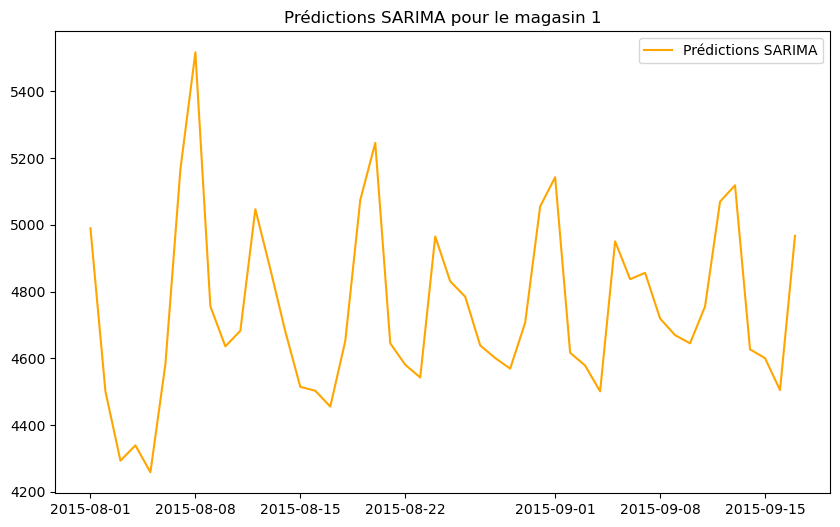

In [189]:
# Créer une liste pour stocker les prédictions
predictions = []

# Boucle sur chaque magasin dans le dataframe test
for store in df_test['Store'].unique():
    
    # Filtrer le dataframe pour les données du magasin courant
    store_data = df_merge2_2015[df_merge2_2015['Store'] == store]
    
    # Agréger les ventes par date pour ce magasin
    store_sales = store_data.groupby('Date')['Sales'].sum()

    # Ajouter une fréquence explicite pour les dates (fréquence journalière)
    store_sales = store_sales.asfreq('D')

    # Diviser les données en train (janvier 2013 à juillet 2015) et test (août-septembre 2015)
    train_data = store_sales[:'2015-07-31']

    # Paramètres du modèle SARIMA (à ajuster en fonction des données)
    p, d, q = 1, 1, 1
    P, D, Q, m = 1, 1, 1, 12  # saisonnalité hebdomadaire

    # Ajuster le modèle SARIMA pour le magasin
    sarima_model = sm.tsa.SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, m))
    sarima_fit = sarima_model.fit(disp=False)

    # Prédire les ventes pour les dates présentes dans df_test pour ce magasin
    test_dates = df_test[df_test['Store'] == store]['Date']
    forecast_sarima = sarima_fit.predict(start=test_dates.min(), end=test_dates.max(), dynamic=False)
    
    # Stocker les prédictions avec l'ID du magasin et la date
    for date, pred in forecast_sarima.items():
        predictions.append({'Store': store, 'Date': date, 'Predicted_Sales': pred})

# Transformer les prédictions en dataframe
df_predictions = pd.DataFrame(predictions)

# Joindre les prédictions au dataframe de test
df_test_with_predictions = df_test.merge(df_predictions, on=['Store', 'Date'], how='left')

# Afficher les premières lignes du dataframe avec les prédictions
print(df_test_with_predictions.head())

# Si tu veux visualiser les prédictions pour un magasin spécifique
store_to_plot = 1  # Par exemple, le magasin 1
plt.figure(figsize=(10, 6))
store_test_data = df_test_with_predictions[df_test_with_predictions['Store'] == store_to_plot]
plt.plot(store_test_data['Date'], store_test_data['Predicted_Sales'], label='Prédictions SARIMA', color='orange')
plt.title(f'Prédictions SARIMA pour le magasin {store_to_plot}')
plt.legend()
plt.show()

In [190]:
#pour l'exemple du magasin1
#les prévisions sont dans les valeurs moyennes de ventes autour de 5000€ de CA et ont une saisonnalité par semaine (fréquentation plus élevées certains jours de la semaine) 
# les prévisions sont cohérentes

#on pourra proposer ses prévisions au responsable pour sa future réunion